# Neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Data Reading, Cleanng and EDA

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [4]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID     TotalPrice  
count  406829.000000  541909.000000  
mean    15287.690570      17.987795  
min     12346.000000 -168469.600000  
25%     13953.000000       3.400000  
50%     15152.000000       9.750000  
75%     16791.000000      17.400000  
max     18287.000000  168469.600000  
std      1713.600303     378.810824

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [8]:
# Next, we'll create a new column called 'canceled' that indicates whether an order was canceled
df['canceled'] = ['C' in str(x) for x in df['InvoiceNo']]

# Finally, we'll create a new dataframe called 'canceled_orders' that contains only the canceled orders
canceled_orders = df[df['canceled'] == True]
canceled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom      -27.50   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom       -4.65   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom      -19.80   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom       -6.96   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom       -6.96   

     canceled  
141      True  
154      True  
235      True  
236      True  
237      True

In [9]:
df_clean = df[df['Quantity'] >= 0]
df_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   canceled  
0     False  
1     False  
2     False  
3     False  
4     False

In [10]:
print("Total number of orders in the dataset:",df_clean['InvoiceNo'].nunique())
print("Total Number of unique customers:",df_clean['CustomerID'].nunique())

Total number of orders in the dataset: 18536
Total Number of unique customers: 4339


Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

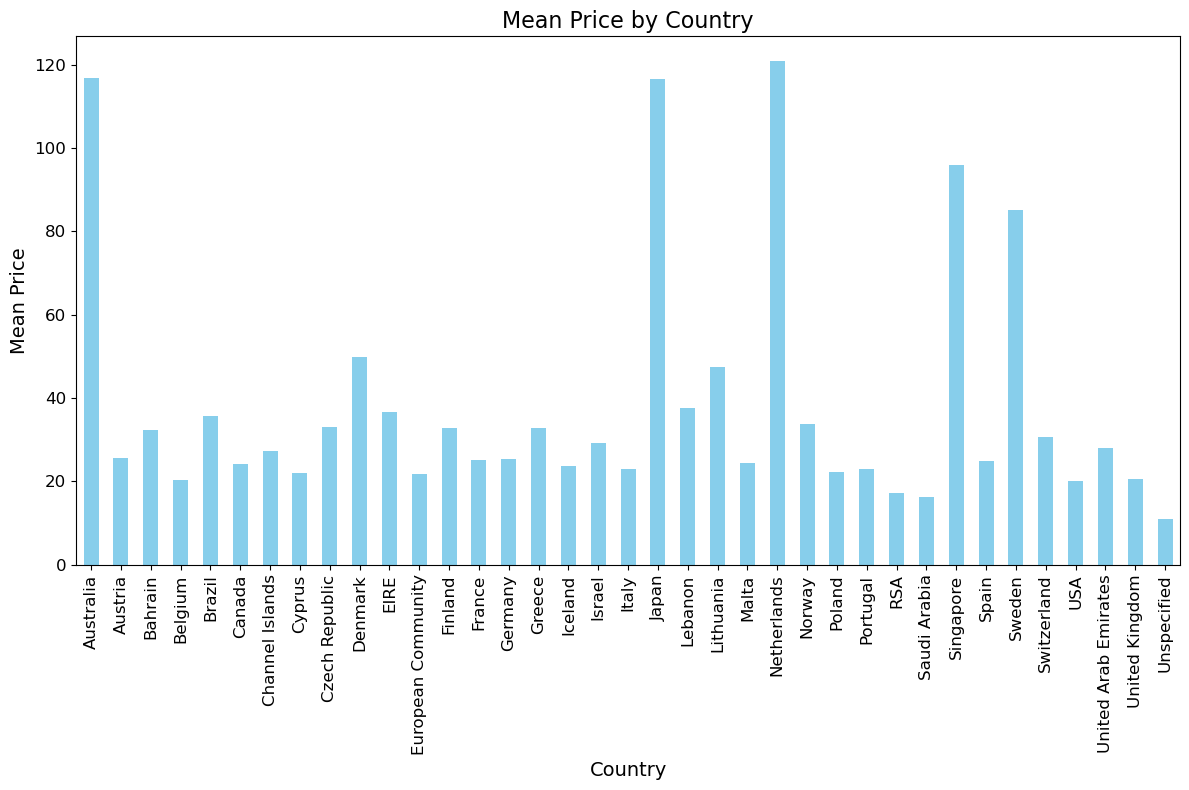

In [11]:
# Now, let's group the data by country and compute the mean total price for each country
country_group = df_clean.groupby('Country')
mean_price_by_country = country_group['TotalPrice'].mean()
print(mean_price_by_country)
# Plot the data
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
mean_price_by_country.plot(kind='bar', color='skyblue')  # You can change 'skyblue' to any color you prefer
plt.title('Mean Price by Country', fontsize=16)  # Increase title font size
plt.xlabel('Country', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Mean Price', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()
plt.show()



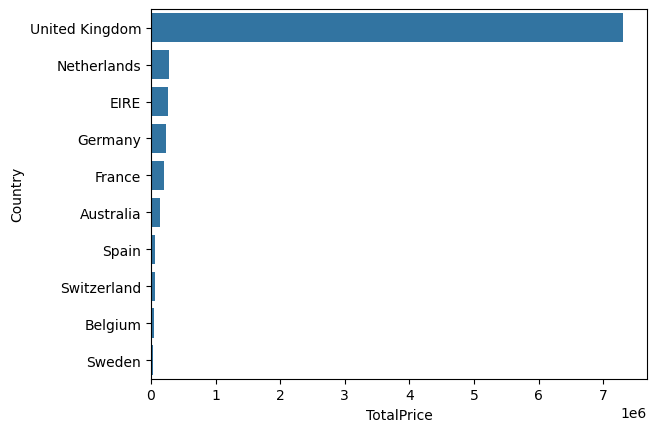

In [12]:
df_countries = df_clean[['Country', 'TotalPrice']]

# Next, we'll group the data by country and sum the total price for each country
df_countries = df_countries.groupby('Country').sum()

# Finally, we'll sort the data by total price and display the top 10 countries
df_countries = df_countries.sort_values('TotalPrice', ascending=False)

# Next, we'll use the seaborn library to create a horizontal bar plot
sns.barplot(x='TotalPrice', y='Country', data=df_countries.reset_index().head(10), orient='h')

# Finally, we'll show the plot
plt.show()

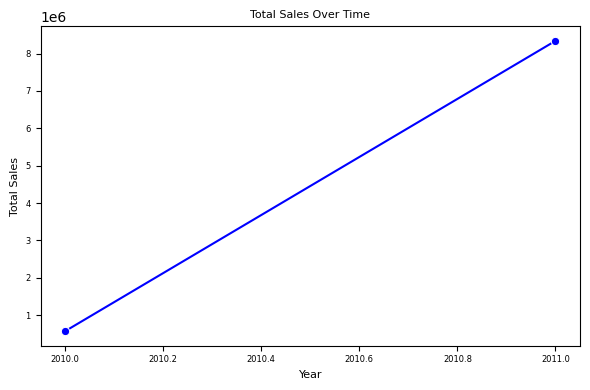

In [13]:
# Next, we'll group the data by invoice date and sum the total price for each date
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
total_sales_by_year = df_clean.groupby('Year')['TotalPrice'].sum()

# Set the plot size
plt.figure(figsize=(6, 4))

# Plot the data
sns.lineplot(x=total_sales_by_year.index, y=total_sales_by_year.values, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title("Total Sales Over Time", fontsize=8)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)

# Customize the ticks
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# Display the plot
plt.tight_layout()
plt.show()

Description                         Country       
PAPER CRAFT , LITTLE BIRDIE         United Kingdom    168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom    110990.20
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom     94858.60
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom     80291.44
JUMBO BAG RED RETROSPOT             United Kingdom     77371.57
PARTY BUNTING                       United Kingdom     63109.38
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom     52395.99
CHILLI LIGHTS                       United Kingdom     45505.31
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     40451.08
PICNIC BASKET WICKER 60 PIECES      United Kingdom     39619.50
Name: TotalPrice, dtype: float64


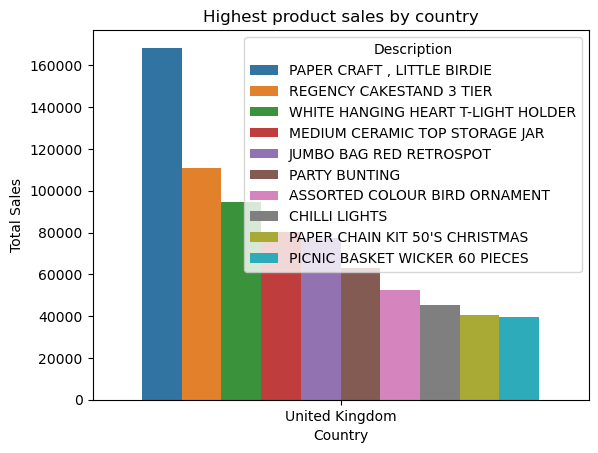

In [14]:
product_sales_by_country = df_clean.groupby(['Description', 'Country'])['TotalPrice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

# Now, we can use Seaborn to plot the top 10 products with the highest sales, along with the country where they had the highest sales
top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='TotalPrice', hue='Description', data=top_products)
plt.title("Highest product sales by country")
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [15]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
...                    ...        ...         ...             ...         ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85   

        canceled  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
541904     False  
541905     False  
541906     False  
541907     False  
541908     False  

[406829 rows x 10 columns]

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


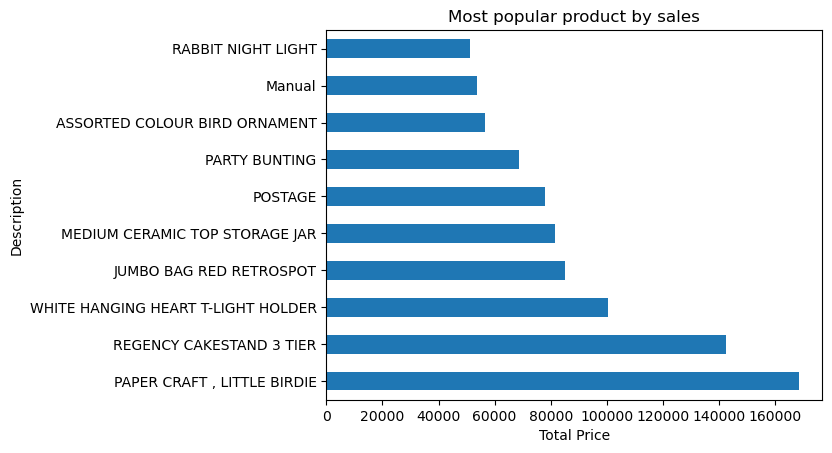

In [16]:
# Group the data by product and sum the total sales for each product
product_sales = df_clean.groupby('Description')['TotalPrice'].sum()

# Sort the data by total sales and select the top 10 products
top_products = product_sales.sort_values(ascending=False).head(10)
print(top_products)

# Plot the data as a horizontal bar chart
top_products.plot(kind='barh')
plt.title("Most popular product by sales")
plt.xlabel("Total Price")
plt.show()

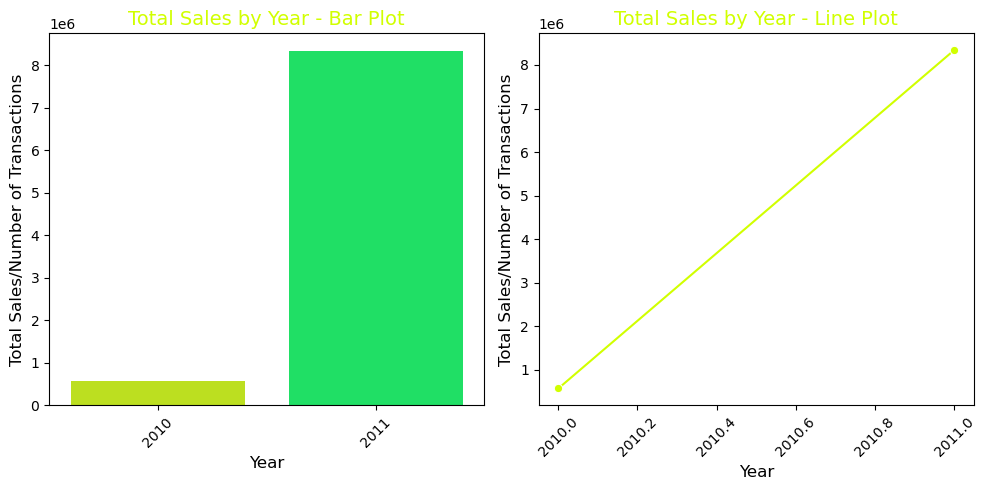

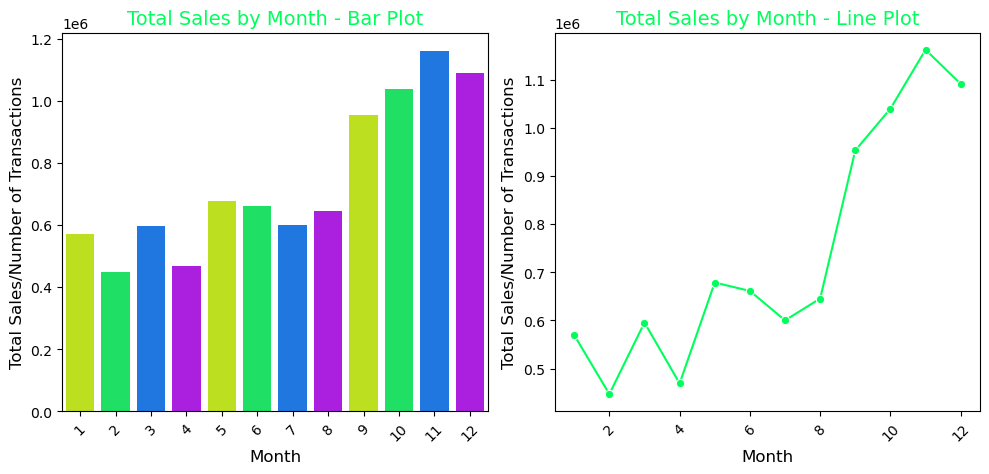

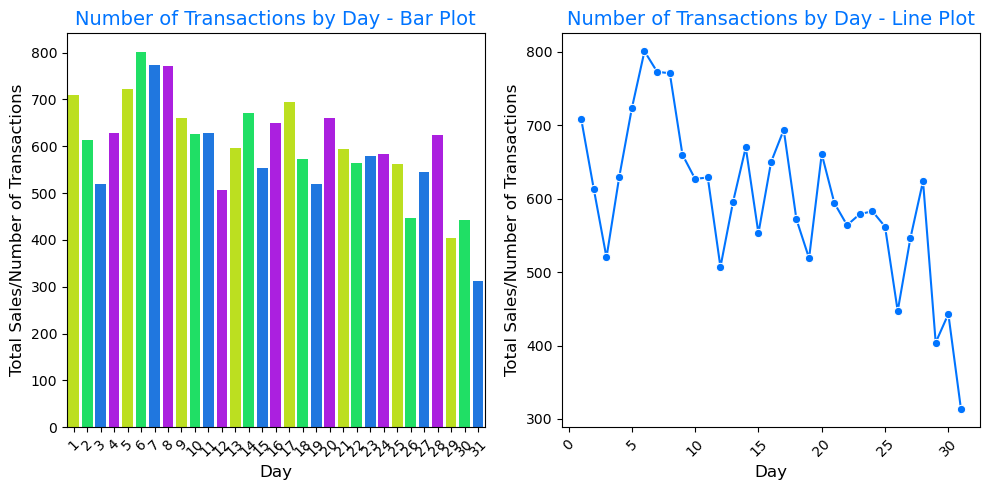

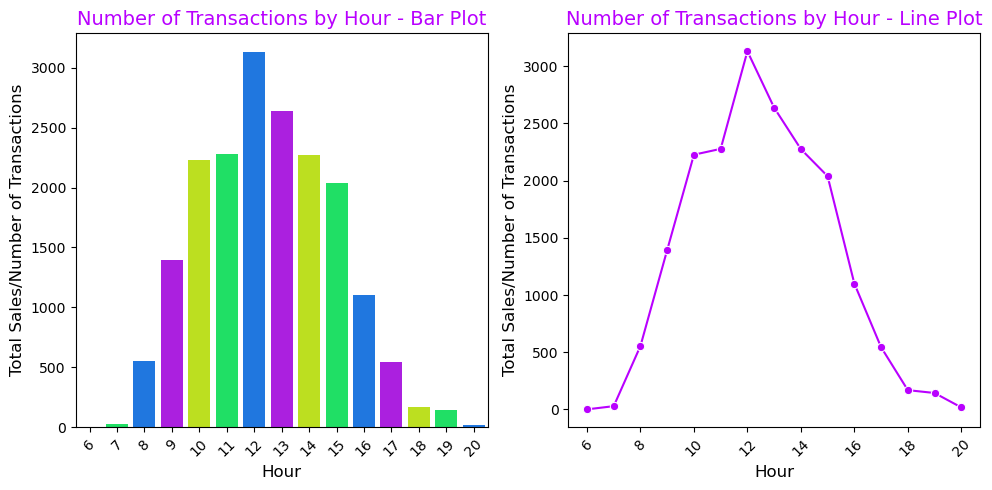

In [17]:
# Now, we'll group the data by year and sum the total sales for each year
df1 = df_clean.copy()

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['Year'] = df1['InvoiceDate'].dt.year
total_sales_by_year = df1.groupby('Year')['TotalPrice'].sum()

# Next, we'll group the data by month and sum the total sales for each month
df1['Month'] = df1['InvoiceDate'].dt.month
total_sales_by_month = df1.groupby('Month')['TotalPrice'].sum()


# Next, we'll group the data by day and count the number of transactions for each day
df1['Day'] = df1['InvoiceDate'].dt.day
num_transactions_by_day = df1.groupby('Day')['InvoiceNo'].nunique()

# Finally, we'll group the data by hour and count the number of transactions for each hour
df1['Hour'] = df1['InvoiceDate'].dt.hour
num_transactions_by_hour = df1.groupby('Hour')['InvoiceNo'].nunique()

# Create a list of dataframes to loop through
dataframes = [total_sales_by_year, total_sales_by_month, num_transactions_by_day, num_transactions_by_hour]

# Create a list of titles for each dataframe
titles = ['Total Sales by Year', 'Total Sales by Month', 'Number of Transactions by Day', 'Number of Transactions by Hour']

# Define a color palette
palette = sns.color_palette("hsv", len(dataframes))

# Loop through the dataframes and plot a barplot and lineplot for each one
for i, (df1, title) in enumerate(zip(dataframes, titles)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Barplot
    sns.barplot(x=df1.index, y=df1.values, ax=ax1, palette=palette)
    ax1.set_title(f'{title} - Bar Plot', fontsize=14, color=palette[i])
    if 'Year' in title:
        ax1.set_xlabel('Year', fontsize=12)
    elif 'Month' in title:
        ax1.set_xlabel('Month', fontsize=12)
    elif 'Day' in title:
        ax1.set_xlabel('Day', fontsize=12)
    elif 'Hour' in title:
        ax1.set_xlabel('Hour', fontsize=12)
    ax1.set_ylabel('Total Sales/Number of Transactions', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Lineplot
    sns.lineplot(x=df1.index, y=df1.values, ax=ax2, marker='o', linestyle='-', color=palette[i])
    ax2.set_title(f'{title} - Line Plot', fontsize=14, color=palette[i])
    if 'Year' in title:
        ax2.set_xlabel('Year', fontsize=12)
    elif 'Month' in title:
        ax2.set_xlabel('Month', fontsize=12)
    elif 'Day' in title:
        ax2.set_xlabel('Day', fontsize=12)
    elif 'Hour' in title:
        ax2.set_xlabel('Hour', fontsize=12)
    ax2.set_ylabel('Total Sales/Number of Transactions', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Preparing the data frame 

## filter the data 

In [18]:
df_clean

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
...                    ...        ...         ...             ...         ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20   
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60   
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60   
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85   

        canceled  Year  
0          False  2010  
1          False  2010  
2          False  2010  
3          False  2010  
4          False  2010  
...          ...   ...  
541904     False  2011  
541905     False  2011  
541906     False  2011  
541907     False  2011  
541908     False  2011  

[397924 rows x 11 columns]

In [19]:
df_clean['InvoiceDate'].min(), df_clean['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [20]:
df_filtered = df_clean[['CustomerID', 'InvoiceDate', 'TotalPrice', 'Country']]
df_filtered

CustomerID         InvoiceDate  TotalPrice         Country
0          17850.0 2010-12-01 08:26:00       15.30  United Kingdom
1          17850.0 2010-12-01 08:26:00       20.34  United Kingdom
2          17850.0 2010-12-01 08:26:00       22.00  United Kingdom
3          17850.0 2010-12-01 08:26:00       20.34  United Kingdom
4          17850.0 2010-12-01 08:26:00       20.34  United Kingdom
...            ...                 ...         ...             ...
541904     12680.0 2011-12-09 12:50:00       10.20          France
541905     12680.0 2011-12-09 12:50:00       12.60          France
541906     12680.0 2011-12-09 12:50:00       16.60          France
541907     12680.0 2011-12-09 12:50:00       16.60          France
541908     12680.0 2011-12-09 12:50:00       14.85          France

[397924 rows x 4 columns]

In [21]:
# Extract the date part from 'InvoiceDate' (ignoring the time part)
df_filtered['InvoiceDate'] = df_filtered['InvoiceDate'].dt.date

# Group by 'CustomerID' and 'InvoiceDate', and sum the 'TotalPrice' for each group
df_merged = df_filtered.groupby(['CustomerID', 'InvoiceDate', 'Country']).agg({
    'TotalPrice': 'sum'
}).reset_index()

In [22]:
# Rename the columns in the DataFrame
df_merged = df_merged.rename(columns={
    'CustomerID': 'customers_id',
    'InvoiceDate': 'date',
    'TotalPrice': 'price_purchase',
    'Country': 'country'
})

In [23]:
df = df_merged.copy()

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df

customers_id       date         country  price_purchase day_of_week
0           12346.0 2011-01-18  United Kingdom        77183.60     Tuesday
1           12347.0 2010-12-07         Iceland          711.79     Tuesday
2           12347.0 2011-01-26         Iceland          475.39   Wednesday
3           12347.0 2011-04-07         Iceland          636.25    Thursday
4           12347.0 2011-06-09         Iceland          382.52    Thursday
...             ...        ...             ...             ...         ...
16761       18283.0 2011-11-30  United Kingdom          223.61   Wednesday
16762       18283.0 2011-12-06  United Kingdom          208.00     Tuesday
16763       18287.0 2011-05-22  United Kingdom          765.28      Sunday
16764       18287.0 2011-10-12  United Kingdom         1001.32   Wednesday
16765       18287.0 2011-10-28  United Kingdom           70.68      Friday

[16766 rows x 5 columns]

In [25]:
df['date'].min(), df['date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [26]:
# Define the date range
start_date = '2010-12-01'
end_date = '2011-11-30'

# Filter the DataFrame based on the date range
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Display the filtered DataFrame
df

customers_id       date         country  price_purchase day_of_week
0           12346.0 2011-01-18  United Kingdom        77183.60     Tuesday
1           12347.0 2010-12-07         Iceland          711.79     Tuesday
2           12347.0 2011-01-26         Iceland          475.39   Wednesday
3           12347.0 2011-04-07         Iceland          636.25    Thursday
4           12347.0 2011-06-09         Iceland          382.52    Thursday
...             ...        ...             ...             ...         ...
16760       18283.0 2011-11-23  United Kingdom          313.65   Wednesday
16761       18283.0 2011-11-30  United Kingdom          223.61   Wednesday
16763       18287.0 2011-05-22  United Kingdom          765.28      Sunday
16764       18287.0 2011-10-12  United Kingdom         1001.32   Wednesday
16765       18287.0 2011-10-28  United Kingdom           70.68      Friday

[16060 rows x 5 columns]

In [27]:
df['date'].min(), df['date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-11-30 00:00:00'))

## making seperate dataframes 

In [28]:
# Initialize the first cutoff dates
start_cutoff_date_0 = pd.Timestamp('2010-12-01')
break_cutoff_date_0 = pd.Timestamp('2011-03-01')

# Create lists to store the dates
start_cutoff_dates = [start_cutoff_date_0]
break_cutoff_dates = [break_cutoff_date_0]

# Calculate the next dates
for i in range(2):
    next_start_date = start_cutoff_dates[i] + pd.DateOffset(months=4)
    next_break_date = break_cutoff_dates[i] + pd.DateOffset(months=4)
    start_cutoff_dates.append(next_start_date)
    break_cutoff_dates.append(next_break_date)
    print(f"start day {i+1} = {start_cutoff_dates[i+1]} \nend day {i+1} = {break_cutoff_dates[i+1]}")

start day 1 = 2011-04-01 00:00:00 
end day 1 = 2011-07-01 00:00:00
start day 2 = 2011-08-01 00:00:00 
end day 2 = 2011-11-01 00:00:00


In [29]:
len(break_cutoff_dates) # Number of data frames created seperately 

3

In [30]:
start_cutoff_dates, break_cutoff_dates

([Timestamp('2010-12-01 00:00:00'),
  Timestamp('2011-04-01 00:00:00'),
  Timestamp('2011-08-01 00:00:00')],
 [Timestamp('2011-03-01 00:00:00'),
  Timestamp('2011-07-01 00:00:00'),
  Timestamp('2011-11-01 00:00:00')])

In [31]:
# Initialize three different DataFrames
num_df = 3
df0, df1, df2 = [pd.DataFrame()] * num_df 

# Filter the DataFrame based on start and break cutoff dates
for i in range(len(break_cutoff_dates)):
    globals()[f"df{i}"] = df[(df['date'] >= start_cutoff_dates[i]) & (df['date'] <= break_cutoff_dates[i])]

In [32]:
df0_label = df[(df['date'] >= break_cutoff_dates[0]) & (df['date'] <= break_cutoff_dates[0] + pd.DateOffset(months=1))]
df1_label = df[(df['date'] >= break_cutoff_dates[1]) & (df['date'] <= break_cutoff_dates[1] + pd.DateOffset(months=1))]
df2_label = df[(df['date'] >= break_cutoff_dates[2]) & (df['date'] <= break_cutoff_dates[2] + pd.DateOffset(months=1))]

df0_label_list = df0_label['customers_id'].tolist()
df1_label_list = df1_label['customers_id'].tolist()
df2_label_list = df2_label['customers_id'].tolist()

### Each data frame dates 

In [33]:
df0['date'].min(), df0['date'].max() , df0_label['date'].min(), df0_label['date'].max()

(Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-03-01 00:00:00'),
 Timestamp('2011-03-01 00:00:00'),
 Timestamp('2011-04-01 00:00:00'))

In [34]:
df1['date'].min(), df1['date'].max() , df1_label['date'].min(), df1_label['date'].max()

(Timestamp('2011-04-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-08-01 00:00:00'))

In [35]:
df2['date'].min(), df2['date'].max() , df2_label['date'].min(), df2_label['date'].max()

(Timestamp('2011-08-01 00:00:00'),
 Timestamp('2011-11-01 00:00:00'),
 Timestamp('2011-11-01 00:00:00'),
 Timestamp('2011-11-30 00:00:00'))

In [36]:
df0.shape

(3147, 5)

## Dropping multiple buys in a single day for each customer

In [37]:
df0 = df0.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df1 = df1.drop_duplicates(subset=['customers_id', 'date'], keep='first')
df2 = df2.drop_duplicates(subset=['customers_id', 'date'], keep='first')

## Drop customers with 2 and bellow orders

In [38]:
customers_to_drop_0 = df0['customers_id'].value_counts()[df0['customers_id'].value_counts() <= 2].index
df0.drop(df0[df0['customers_id'].isin(customers_to_drop_0)].index, inplace=True)

customers_to_drop_1 = df1['customers_id'].value_counts()[df1['customers_id'].value_counts() <= 2].index
df1.drop(df1[df1['customers_id'].isin(customers_to_drop_1)].index, inplace=True)

customers_to_drop_2 = df2['customers_id'].value_counts()[df2['customers_id'].value_counts() <= 2].index
df2.drop(df2[df2['customers_id'].isin(customers_to_drop_2)].index, inplace=True)

In [39]:
df0.shape, df1.shape, df2.shape

((1445, 5), (1625, 5), (1918, 5))

# Feature extraction

## Time of the purchase related features

<span style="color: red; font-size: 25px; font-weight: bold;">add month of purchase feature</span>

In [40]:
df0['purchase_month'] = df0['date'].dt.to_period('M')
df1['purchase_month'] = df1['date'].dt.to_period('M')
df2['purchase_month'] = df2['date'].dt.to_period('M')

<span style="color: red; font-size: 25px; font-weight: bold;">most common day feature</span>

In [41]:
def add_most_common_day(df):
    # Define a function to determine the most common day using pandas' mode
    def most_common_day(series):
        return series.mode().iloc[0]  # Take the first mode in case of ties

    # Group by 'customer_id' and apply the function to 'day_of_week'
    common_days = df.groupby('customers_id')['day_of_week'].agg(most_common_day).reset_index()
    common_days.rename(columns={'day_of_week': 'most_common_day'}, inplace=True)

    # Merge this back to the original DataFrame
    df_with_common_day = df.merge(common_days, on='customers_id')

    return df_with_common_day

df0 = add_most_common_day(df0)
df1 = add_most_common_day(df1)
df2 = add_most_common_day(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">number of purchase feature</span>

In [42]:
def purchase_count(df):
    count_purchase = df['customers_id'].value_counts().rename('number_of_purchases')
    return df.merge(count_purchase, left_on = 'customers_id', right_index = True)


df0 = purchase_count(df0)
df1 = purchase_count(df1)
df2 = purchase_count(df2)


<span style="color: red; font-size: 25px; font-weight: bold;">wighted mean time between purchase featrue</span>

In [43]:
def calculate_weighted_mean_time_between_purchases(df):
    # Sort the data by customer ID and date in descending order to ensure recent dates come first
    sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
    
    # Calculate the time difference between consecutive purchases for each customer
    sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1  # Multiply by -1 to get positive days

    # Drop rows without a time difference (first purchase of each customer)
    time_diffs = sorted_df.dropna(subset=['time_diff'])

    # Apply the weight formula to each customer's time differences
    # (i-1)^2 for each difference, where i is the reverse index within each group
    def weighted_mean(group):
        n = len(group)
        weights = [(n - i) ** 2 for i in range(n)]
        return np.average(group, weights=weights)

    # Calculate the weighted mean time difference for each customer
    weighted_mean_time_diff = time_diffs.groupby('customers_id')['time_diff'].apply(weighted_mean).reset_index(name='weighted_mean_time_between_purchases')
    
    # Merge the weighted mean time difference back into the original data frame
    merged_df = df.merge(weighted_mean_time_diff, on='customers_id', how='left')

    # Fill NaN values for customers with only one purchase
    merged_df['weighted_mean_time_between_purchases'] = merged_df['weighted_mean_time_between_purchases'].fillna(0)

    return merged_df

df0 = calculate_weighted_mean_time_between_purchases(df0)
df1 = calculate_weighted_mean_time_between_purchases(df1)
df2 = calculate_weighted_mean_time_between_purchases(df2)


<span style="color: red; font-size: 25px; font-weight: bold;">std time between purchases feature </span>

In [44]:
def calculate_std_features(df):
    # Sort the data by customers ID and date in descending order to ensure recent dates come first
    sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
    
    # Calculate the time difference between consecutive purchases for each customer
    sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1  # Multiply by -1 to get positive days

    # Function to calculate std_between_purchase
    def calculate_std_between_purchase(group):
        n = len(group)
        if n == 1:
            return 0  # Return 0 if there is only one purchase
        
        # Compute weights
        weights = [(n - i) ** 2 for i in range(1, n)]
        weight_sum = sum(weights)
        normalized_weights = [w / weight_sum for w in weights]

        # Compute weighted mean
        weighted_mean = np.dot(group[1:], normalized_weights)

        # Compute std_between_purchase
        squared_differences = ((group[1:] - weighted_mean) ** 2)
        return np.sqrt(np.dot(squared_differences, normalized_weights))

    # Calculate std_between_purchase for each customer
    std_between_purchase = sorted_df.groupby('customers_id')['time_diff'].apply(calculate_std_between_purchase).reset_index(name='std_between_purchase')
    
    # Merge only the std_between_purchase column back into the original data frame
    merged_df = df.merge(std_between_purchase, on='customers_id', how='left')

    return merged_df

df0 = calculate_std_features(df0)
df1 = calculate_std_features(df1)
df2 = calculate_std_features(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">maximum time without purchase</span>

In [45]:
from datetime import datetime
def calculate_max_without_purchase(df):
    # Ensure the 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Sort the data by customers ID and date in descending order to ensure recent dates come first
    sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
    
    # Calculate the time difference between consecutive purchases for each customer
    sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1  # Multiply by -1 to get positive days

    # Calculate maximum time without purchase for each customer
    max_time_without_purchase = sorted_df.groupby('customers_id')['time_diff'].max().reset_index(name='max_time_without_purchase')
    
    # Merge the maximum time without purchase back into the original data frame
    merged_df = df.merge(max_time_without_purchase, on='customers_id', how='left')

    return merged_df


df0 = calculate_max_without_purchase(df0)
df1 = calculate_max_without_purchase(df1)
df2 = calculate_max_without_purchase(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">time since last purchased (months) feature</span>

In [46]:
def calculate_time_since_last_purchase_0(df):
    
    # Get the most recent purchase date for each customer
    last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')

    specific_date = break_cutoff_dates[0]
    last_purchase_date['time_since_last_purchase'] = (
        (specific_date.year - last_purchase_date['last_purchase_date'].dt.year) * 12 +
        (specific_date.month - last_purchase_date['last_purchase_date'].dt.month)
    )
    # last_purchase_date['time_since_last_purchase'] = (specific_date - last_purchase_date['last_purchase_date']).dt.days
    # Merge this information back into the original data frame
    merged_df = df.merge(last_purchase_date[['customers_id', 'time_since_last_purchase']], on='customers_id', how='left')

    return merged_df
df0 = calculate_time_since_last_purchase_0(df0)


def calculate_time_since_last_purchase_1(df):
    
    # Get the most recent purchase date for each customer
    last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')

    specific_date = break_cutoff_dates[1]
    last_purchase_date['time_since_last_purchase'] = (
        (specific_date.year - last_purchase_date['last_purchase_date'].dt.year) * 12 +
        (specific_date.month - last_purchase_date['last_purchase_date'].dt.month)
    )
    # last_purchase_date['time_since_last_purchase'] = (specific_date - last_purchase_date['last_purchase_date']).dt.days

    # Merge this information back into the original data frame
    merged_df = df.merge(last_purchase_date[['customers_id', 'time_since_last_purchase']], on='customers_id', how='left')

    return merged_df
df1 = calculate_time_since_last_purchase_1(df1)


def calculate_time_since_last_purchase_2(df):
    
    # Get the most recent purchase date for each customer
    last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')

    specific_date = break_cutoff_dates[2]
    last_purchase_date['time_since_last_purchase'] = (
        (specific_date.year - last_purchase_date['last_purchase_date'].dt.year) * 12 +
        (specific_date.month - last_purchase_date['last_purchase_date'].dt.month)
    )
    # last_purchase_date['time_since_last_purchase'] = (specific_date - last_purchase_date['last_purchase_date']).dt.days

    # Merge this information back into the original data frame
    merged_df = df.merge(last_purchase_date[['customers_id', 'time_since_last_purchase']], on='customers_id', how='left')

    return merged_df
df2 = calculate_time_since_last_purchase_2(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">transaction recency (time since last purchase/n unique)</span>

In [47]:
def calculate_transaction_recency(df):
    num_unique_customers = df['customers_id'].nunique()
    
    last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')
    
    last_purchase_date['time_since_last_purchase'] = df['time_since_last_purchase']
    
    last_purchase_date['transaction recency'] = last_purchase_date['time_since_last_purchase'] / num_unique_customers
    
    merged_df = df.merge(last_purchase_date[['customers_id', 'transaction recency']], on='customers_id', how='left')
    
    return merged_df

df0 = calculate_transaction_recency(df0)
df1 = calculate_transaction_recency(df1)
df2 = calculate_transaction_recency(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">add onehot feature that represents time since last purchase</span>

In [48]:
def add_onehot_last_purchase(df, threshold):
    upper_limit = threshold + 30
    new_column_name = f'last_between_{threshold}_and_{upper_limit}'
    df[new_column_name] = ((df['time_since_last_purchase'] >= threshold) & (df['time_since_last_purchase'] < upper_limit)).astype(int)
    return df

numbers = [0, 30, 60]

# Loop through the list and apply the function
for threshold in numbers:
    df0 = add_onehot_last_purchase(df0, threshold)
    df1 = add_onehot_last_purchase(df1, threshold)
    df2 = add_onehot_last_purchase(df2, threshold)

<span style="color: red; font-size: 25px; font-weight: bold;">time between last purchase and the penultimate purchase</span>

In [49]:
def calculate_time_between_last_two_purchases(df):
    # Ensure the date column is in datetime format for accurate date calculations
    if df['date'].dtype == 'object':
        df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by customers_id and date to ensure correct ordering
    df_sorted = df.sort_values(by=['customers_id', 'date'])

    # Group by customers_id and collect dates into lists
    grouped_dates = df_sorted.groupby('customers_id')['date'].apply(list)

    # Calculate the difference in days between the last two dates for each customer
    diff_last_and_penultimate = grouped_dates.apply(lambda dates: (dates[-1] - dates[-2]).days if len(dates) > 1 else None)

    # Convert to DataFrame to merge
    diff_last_and_penultimate = diff_last_and_penultimate.reset_index(name='diff_last_and_penultimate')

    # Merge this new column back into the original DataFrame
    df = df.merge(diff_last_and_penultimate, on='customers_id', how='left')

    return df

df0 = calculate_time_between_last_two_purchases(df0)
df1 = calculate_time_between_last_two_purchases(df1)
df2 = calculate_time_between_last_two_purchases(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">time between penultimate purchase and third-to-last</span>

In [50]:
def calculate_time_between_penultimate_and_previous(df):
    # Ensure the date column is in datetime format for accurate date calculations
    if df['date'].dtype == 'object':
        df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by customers_id and date to ensure correct ordering
    df_sorted = df.sort_values(by=['customers_id', 'date'])

    # Group by customers_id and collect dates into lists
    grouped_dates = df_sorted.groupby('customers_id')['date'].apply(list)

    # Calculate the difference in days between the penultimate and the one before it for each customer
    diff_penultimate_and_previous = grouped_dates.apply(
        lambda dates: (dates[-2] - dates[-3]).days if len(dates) > 2 else None
    )

    # Convert to DataFrame to merge
    diff_penultimate_and_previous = diff_penultimate_and_previous.reset_index(name='diff_penultimate_and_previous')

    # Merge this new column back into the original DataFrame
    df = df.merge(diff_penultimate_and_previous, on='customers_id', how='left')

    return df

df0 = calculate_time_between_penultimate_and_previous(df0)
df1 = calculate_time_between_penultimate_and_previous(df1)
df2 = calculate_time_between_penultimate_and_previous(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">defining treshholds using mean time between purchases and its STD</span>

In [51]:
def add_threshold_features(df):
    h_1 = 2
    h_2 = 4
    h_3 = 8
    df['tresh_1'] = df['weighted_mean_time_between_purchases'] + h_1*df['std_between_purchase']
    df['tresh_2'] = df['weighted_mean_time_between_purchases'] + h_2*df['std_between_purchase']
    df['tresh_3'] = df['weighted_mean_time_between_purchases'] + h_3*df['std_between_purchase']
    return df

df0 = add_threshold_features(df0)
df1 = add_threshold_features(df1)
df2 = add_threshold_features(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">frequency classification</span>

In [52]:
def classify_frequency(row):
    if row['time_since_last_purchase'] <= row['tresh_1']:
        return 'normal'
    elif row['time_since_last_purchase'] <= row['tresh_2']:
        return 'attrition'
    elif row['time_since_last_purchase'] <= row['tresh_3']:
        return 'at-risk'
    else:
        return 'lost'

def frequency_classification(df):
    df['freq_class'] = df.apply(classify_frequency, axis=1)
    return df

df0 = frequency_classification(df0)
df1 = frequency_classification(df1)
df2 = frequency_classification(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">rolling average 3</span>

In [53]:
def add_moving_average_3_purchase_feature(df):
    # Sort the DataFrame by customer ID and date to ensure the rolling window is correctly applied
    df_sorted = df.sort_values(by=['customers_id', 'date']).copy()

    # Calculate the rolling mean of the last 3 purchases for each customer
    # and directly add it to the DataFrame
    df['rolling_avg_3'] = df_sorted.groupby('customers_id')['price_purchase'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean())

    return df  # Ensure that the modified DataFrame is returned

df0 = add_moving_average_3_purchase_feature(df0)
df1 = add_moving_average_3_purchase_feature(df1)
df2 = add_moving_average_3_purchase_feature(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">rolling average 6</span>

In [54]:
def add_moving_average_6_purchase_feature(df):
    # Sort the DataFrame by customer ID and date to ensure the rolling window is correctly applied
    df_sorted = df.sort_values(by=['customers_id', 'date']).copy()

    # Calculate the rolling mean of the last 6 purchases for each customer
    # and directly add it to the DataFrame
    df['rolling_avg_6'] = df_sorted.groupby('customers_id')['price_purchase'].transform(
        lambda x: x.rolling(window=6, min_periods=1).mean())

    return df  # Ensure that the modified DataFrame is returned

# df_train = add_moving_average_6_purchase_feature(df_train)
# df_test = add_moving_average_6_purchase_feature(df_test)

df0 = add_moving_average_6_purchase_feature(df0)
df1 = add_moving_average_6_purchase_feature(df1)
df2 = add_moving_average_6_purchase_feature(df2)

## Value of purchase related features

<span style="color: red; font-size: 25px; font-weight: bold;">binned purchase</span>

In [55]:
def add_binned_purchase_feature(df):
    # Group by 'customer_id' and sum 'price_purchase' for each group
    purchase_sums = df.groupby('customers_id')['price_purchase'].sum().reset_index(name='binned_purchase')

    # Merge the summed data back into the original DataFrame
    df = pd.merge(df, purchase_sums, on='customers_id', how='left')

    return df

df0 = add_binned_purchase_feature(df0)
df1 = add_binned_purchase_feature(df1)
df2 = add_binned_purchase_feature(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">relative change</span>

In [56]:
def calculate_relative_change(df):
    # Ensure the DataFrame is sorted by customer ID and date
    df_sorted = df.sort_values(by=['customers_id', 'date'])

    # Calculate rolling average of the last 6 purchases if not already present
    if 'rolling_avg_6' not in df.columns:
        df_sorted['rolling_avg_6'] = df_sorted.groupby('customers_id')['price_purchase'].transform(
            lambda x: x.rolling(window=6, min_periods=1).mean())

    # Fill NA values in 'rolling_avg_6' with 0 after calculation
    df_sorted['rolling_avg_6'].fillna(0, inplace=True)

    # Retrieve the last 'price_purchase' value for each customer and fill NA values
    last_price_purchase = df_sorted.groupby('customers_id')['price_purchase'].last().fillna(0)

    # Retrieve the 'rolling_avg_6' value from six purchases ago or the first one if fewer than six
    sixth_last_rolling_avg = df_sorted.groupby('customers_id').apply(
        lambda x: x['rolling_avg_6'].iloc[-6] if len(x) >= 6 else x['rolling_avg_6'].iloc[0]).fillna(0)

    # Calculate the relative change by subtracting and dividing as specified
    relative_change = (last_price_purchase - sixth_last_rolling_avg) / sixth_last_rolling_avg.replace(0, 1)  # Avoid division by zero

    # Add this new column back to the original DataFrame
    df['d'] = df['customers_id'].map(relative_change)

    return df

df0 = calculate_relative_change(df0)
df1 = calculate_relative_change(df1)
df2 = calculate_relative_change(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">purchase trend</span>

In [57]:
def purchase_trend_classifier(row):
    a1 = 0.15
    a2 = 0.225
    a3 = 0.3
    if row['d'] <= -a3:
        return 'decreasing--'
    elif -a3 < row['d'] <= -a2:
        return 'decreasing-'
    elif -a2 < row['d'] <= -a1:
        return 'decreasing'
    elif -a1 < row['d'] <= a1:
        return 'stable'
    elif a1 < row['d'] <= a2:
        return 'increasing'
    elif a2 < row['d'] <= a3:
        return 'increasing+'
    elif a3 < row['d']:
        return 'increasing++'


def purchase_trend(df):
    df['purchase_trend'] = df.apply(purchase_trend_classifier, axis=1)
    return df

df0 = purchase_trend(df0)
df1 = purchase_trend(df1)
df2 = purchase_trend(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">maximum value of purchase feature</span>

In [58]:
def add_max_purchase_feature(df):
    # Group by 'customer_id' and find the maximum 'price_purchase' for each group
    max_purchase = df.groupby('customers_id')['price_purchase'].max().reset_index(name='max_purchase')

    # Merge the maximum purchase data back into the original DataFrame
    df = pd.merge(df, max_purchase, on='customers_id', how='left')

    return df

df0 = add_max_purchase_feature(df0)
df1 = add_max_purchase_feature(df1)
df2 = add_max_purchase_feature(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">mean value of purchase feature </span>

In [59]:
def add_mean_purchase_feature(df):
    # Group by 'customer_id' and calculate the mean 'price_purchase' for each group
    mean_purchase = df.groupby('customers_id')['price_purchase'].mean().reset_index(name='mean_purchase')

    # Merge the mean purchase data back into the original DataFrame
    df = pd.merge(df, mean_purchase, on='customers_id', how='left')

    return df

df0 = add_mean_purchase_feature(df0)
df1 = add_mean_purchase_feature(df1)
df2 = add_mean_purchase_feature(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">median value of purchase per customer</span>

In [60]:
def add_median_purchase_feature(df):
    # Group by 'customer_id' and calculate the median 'price_purchase' for each group
    median_purchase = df.groupby('customers_id')['price_purchase'].median().reset_index(name='median_purchase')

    # Merge the median purchase data back into the original DataFrame
    df = pd.merge(df, median_purchase, on='customers_id', how='left')

    return df

df0 = add_median_purchase_feature(df0)
df1 = add_median_purchase_feature(df1)
df2 = add_median_purchase_feature(df2)

<span style="color: red; font-size: 25px; font-weight: bold;">relative change in purchase value feature</span>

In [61]:
def calculate_relative_purchase_value(df):
    # Sort the dataframe to ensure purchases are in order
    df = df.sort_values(['customers_id', 'date']) 

    # Calculate the relative purchase value per customer
    rel_purchase_values = df.groupby('customers_id').apply(lambda group: calculate_rel_value(group))

    # Merge the calculated values back into the DataFrame
    df = df.merge(rel_purchase_values.rename('rel_purchase_value'), on='customers_id', how='left')

    return df

# Helper function to calculate relative purchase value for a group
def calculate_rel_value(group):
    if len(group) < 5:
        first_value = group.iloc[0]['price_purchase']
        last_value = group.iloc[-1]['price_purchase']
        if first_value == 0:
            return np.nan  # Avoid division by zero
        return (last_value - first_value) / first_value
    else:
        fifth_from_last_value = group.iloc[-5]['price_purchase']
        last_value = group.iloc[-1]['price_purchase']
        if fifth_from_last_value == 0:
            return np.nan  # Avoid division by zero
        return (last_value - fifth_from_last_value) / fifth_from_last_value
    
df0 = calculate_relative_purchase_value(df0)
df1 = calculate_relative_purchase_value(df1)
df2 = calculate_relative_purchase_value(df2)

fill the NaN values

In [62]:
df0['rel_purchase_value'].fillna(0, inplace = True)
df1['rel_purchase_value'].fillna(0, inplace = True)
df2['rel_purchase_value'].fillna(0, inplace = True)

<span style="color: red; font-size: 25px; font-weight: bold;">categorical variable defining frame variation</span>

In [63]:
def time_frame_var_row(row):
    mu = 0.3
    if row['rel_purchase_value'] < -mu:
        return 'steady'
    elif abs(row['rel_purchase_value']) <= mu:
        return 'within-limits'
    elif row['rel_purchase_value'] > mu:
        return 'altering'

def time_frame_char(df):
    df['time_frame_char'] = df.apply(time_frame_var_row, axis=1)
    return df


df0 = time_frame_char(df0)
df1 = time_frame_char(df1)
df2 = time_frame_char(df2)

## Making a list of the fetures

In [64]:
features_list = df0.columns.tolist()
print(features_list)
len(features_list)

['customers_id', 'date', 'country', 'price_purchase', 'day_of_week', 'purchase_month', 'most_common_day', 'number_of_purchases', 'weighted_mean_time_between_purchases', 'std_between_purchase', 'max_time_without_purchase', 'time_since_last_purchase', 'transaction recency', 'last_between_0_and_30', 'last_between_30_and_60', 'last_between_60_and_90', 'diff_last_and_penultimate', 'diff_penultimate_and_previous', 'tresh_1', 'tresh_2', 'tresh_3', 'freq_class', 'rolling_avg_3', 'rolling_avg_6', 'binned_purchase', 'd', 'purchase_trend', 'max_purchase', 'mean_purchase', 'median_purchase', 'rel_purchase_value', 'time_frame_char']


32

In [65]:
df0.shape, df1.shape, df2.shape

((1445, 32), (1625, 32), (1918, 32))

## Adding year, month and day feature

In [66]:
df0['year'] = df0['date'].dt.year
df0['month'] = df0['date'].dt.month
df0['day'] = df0['date'].dt.day

df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

## Adding label to the data

In [67]:
def label_df_with_list(df, customer_ids_list):
    # Create a new DataFrame to avoid modifying the original one
    labeled_df = df.copy()
    
    # Create a new column 'label' in labeled_df and initialize it with 0
    labeled_df['label'] = 0
    
    # Set label as 1 for customer IDs present in customer_ids_list
    labeled_df.loc[labeled_df['customers_id'].isin(customer_ids_list), 'label'] = 1
    
    return labeled_df

df0_labled  = label_df_with_list(df0, df0_label_list)
df1_labled = label_df_with_list(df1, df1_label_list)  
df2_labled = label_df_with_list(df2, df2_label_list) 

# Preparing the Data for the model

## Concat 3 data frames

In [68]:
# List of DataFrames
dfs = [df0_labled, df1_labled, df2_labled]

# Concatenate all DataFrames
final_df = pd.concat(dfs, ignore_index=True)

final_df

customers_id       date         country  price_purchase day_of_week  \
0          12395.0 2010-12-03         Belgium          346.10      Friday   
1          12395.0 2010-12-17         Belgium          333.82      Friday   
2          12395.0 2011-02-11         Belgium          231.51      Friday   
3          12415.0 2011-01-06       Australia         7011.38    Thursday   
4          12415.0 2011-01-10       Australia           81.60      Monday   
...            ...        ...             ...             ...         ...   
4983       18241.0 2011-10-17  United Kingdom          131.18      Monday   
4984       18241.0 2011-10-21  United Kingdom           54.60      Friday   
4985       18257.0 2011-08-17  United Kingdom          627.27   Wednesday   
4986       18257.0 2011-10-03  United Kingdom          532.38      Monday   
4987       18257.0 2011-10-31  United Kingdom          242.38      Monday   

     purchase_month most_common_day  number_of_purchases  \
0           2010-12          Friday                    3   
1           2010-12          Friday                    3   
2           2011-02          Friday                    3   
3           2011-01          Monday                    3   
4           2011-01          Monday                    3   
...             ...             ...                  ...   
4983        2011-10          Monday                   12   
4984        2011-10          Monday                   12   
4985        2011-08          Monday                    3   
4986        2011-10          Monday                    3   
4987        2011-10          Monday                    3   

      weighted_mean_time_between_purchases  std_between_purchase  ...  \
0                                47.600000             16.800000  ...   
1                                47.600000             16.800000  ...   
2                                47.600000             16.800000  ...   
3                                29.600000             12.800000  ...   
4                                29.600000             12.800000  ...   
...                                    ...                   ...  ...   
4983                              8.031621              5.465576  ...   
4984                              8.031621              5.465576  ...   
4985                             31.800000              7.600000  ...   
4986                             31.800000              7.600000  ...   
4987                             31.800000              7.600000  ...   

      purchase_trend  max_purchase  mean_purchase  median_purchase  \
0       decreasing--        346.10     303.810000           333.82   
1       decreasing--        346.10     303.810000           333.82   
2       decreasing--        346.10     303.810000           333.82   
3       increasing++      14022.92    7038.633333          7011.38   
4       increasing++      14022.92    7038.633333          7011.38   
...              ...           ...            ...              ...   
4983    decreasing--        184.78     108.560000           107.13   
4984    decreasing--        184.78     108.560000           107.13   
4985    decreasing--        627.27     467.343333           532.38   
4986    decreasing--        627.27     467.343333           532.38   
4987    decreasing--        627.27     467.343333           532.38   

      rel_purchase_value  time_frame_char  year  month  day  label  
0              -0.331089           steady  2010     12    3      1  
1              -0.331089           steady  2010     12   17      1  
2              -0.331089           steady  2011      2   11      1  
3               1.000023         altering  2011      1    6      1  
4               1.000023         altering  2011      1   10      1  
...                  ...              ...   ...    ...  ...    ...  
4983           -0.501643           steady  2011     10   17      1  
4984           -0.501643           steady  2011     10   21      1  
4985           -0.613

## Shuffling

In [69]:
final_df = final_df.sample(frac=1, random_state = 54).reset_index(drop=True)

## defining X and y

In [70]:
X = final_df.drop(['label'], axis = 1)
y = final_df['label']
X.shape, y.shape 

((4988, 35), (4988,))

In [71]:
X.columns

Index(['customers_id', 'date', 'country', 'price_purchase', 'day_of_week',
       'purchase_month', 'most_common_day', 'number_of_purchases',
       'weighted_mean_time_between_purchases', 'std_between_purchase',
       'max_time_without_purchase', 'time_since_last_purchase',
       'transaction recency', 'last_between_0_and_30',
       'last_between_30_and_60', 'last_between_60_and_90',
       'diff_last_and_penultimate', 'diff_penultimate_and_previous', 'tresh_1',
       'tresh_2', 'tresh_3', 'freq_class', 'rolling_avg_3', 'rolling_avg_6',
       'binned_purchase', 'd', 'purchase_trend', 'max_purchase',
       'mean_purchase', 'median_purchase', 'rel_purchase_value',
       'time_frame_char', 'year', 'month', 'day'],
      dtype='object')

In [72]:
y.value_counts()

label
1    3903
0    1085
Name: count, dtype: int64

## y distribution

label
1    78.0
0    22.0
Name: proportion, dtype: float64


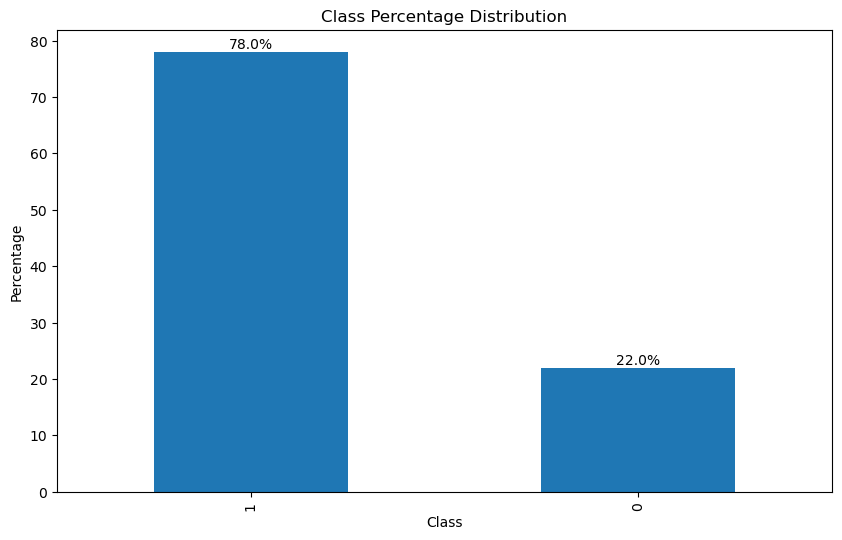

In [73]:
class_percentage = (y.value_counts(normalize=True) * 100).round(0)
print(class_percentage)
# Plot the bar graph
plt.figure(figsize=(10, 6))
class_percentage.plot(kind='bar')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentage Distribution')

# Show the values on the bars
for index, value in enumerate(class_percentage):
    plt.text(index, value, f'{value}%', ha='center', va='bottom')

# Show the plot
plt.show()

## Train-Test split

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3990, 35)
X_test shape: (998, 35)
y_train shape: (3990,)
y_test shape: (998,)


## Transforming categorical data to numeric data using Label Encoder

In [75]:
object_columns = X.select_dtypes(include=['object'])
object_column_names = object_columns.columns.tolist()
print(object_column_names)

['country', 'day_of_week', 'most_common_day', 'freq_class', 'purchase_trend', 'time_frame_char']


In [76]:
from sklearn.preprocessing import LabelEncoder
# List of features to encode
features_to_encode = object_column_names

# Initialize the LabelEncoder dictionary
label_encoders = {}

# Encode features in X_train
for feature in features_to_encode:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    label_encoders[feature] = le  # Store the encoder to apply to X_test later

# Encode features in X_test using the same encoders
for feature in features_to_encode:
    le = label_encoders[feature]
    X_test[feature] = le.transform(X_test[feature])  # Use transform to ensure consistency

# Print the first few rows of X_train and X_test to verify encoding
print("X_train:")
X_train.head()
print("\nX_test:")
X_test.head()

X_train:

X_test:


customers_id       date  country  price_purchase  day_of_week  \
2684       15867.0 2010-12-20       16          242.92            1   
3209       12971.0 2011-01-11       16           71.50            4   
954        17338.0 2011-01-12       16          770.75            5   
2827       15296.0 2011-05-11       16          578.48            5   
2749       12747.0 2011-01-20       16          303.04            3   

     purchase_month  most_common_day  number_of_purchases  \
2684        2010-12                1                    6   
3209        2011-01                4                   17   
954         2011-01                1                    3   
2827        2011-05                0                    3   
2749        2011-01                1                    4   

      weighted_mean_time_between_purchases  std_between_purchase  ...  \
2684                             18.290909              4.154615  ...   
3209                              5.394385              3.216281  ...   
954                              38.000000              4.000000  ...   
2827                             12.200000              8.400000  ...   
2749                             37.142857              8.131571  ...   

             d  purchase_trend  max_purchase  mean_purchase  median_purchase  \
2684  0.178034               3        242.92     178.353333          172.055   
3209  0.810586               5        189.50     108.080588          111.530   
954   0.456227               5       1117.80     885.383333          770.750   
2827 -0.975972               2        578.48     297.386667          299.780   
2749 -0.133255               6        358.56     330.022500          329.245   

      rel_purchase_value  time_frame_char  year  month  day  
2684           -0.339623                1  2010     12   20  
3209            3.246719                0  2011      1   11  
954             0.456227                0  2011      1   12  
2827           -0.975972                1  2011      5   11  
2749           -0.133255                2  2011      1   20  

[5 rows x 35 columns]

## Drop the unneccasery features (datetime, treshholds ...)

In [77]:
X_train = X_train.drop(['tresh_1', 'tresh_2', 'tresh_3', 'd', 'purchase_month', 'date'], axis=1)
X_test = X_test.drop(['tresh_1', 'tresh_2', 'tresh_3', 'd', 'purchase_month', 'date'], axis=1)
X_train.shape, X_test.shape

((3990, 29), (998, 29))

In [78]:
X_train.columns

Index(['customers_id', 'country', 'price_purchase', 'day_of_week',
       'most_common_day', 'number_of_purchases',
       'weighted_mean_time_between_purchases', 'std_between_purchase',
       'max_time_without_purchase', 'time_since_last_purchase',
       'transaction recency', 'last_between_0_and_30',
       'last_between_30_and_60', 'last_between_60_and_90',
       'diff_last_and_penultimate', 'diff_penultimate_and_previous',
       'freq_class', 'rolling_avg_3', 'rolling_avg_6', 'binned_purchase',
       'purchase_trend', 'max_purchase', 'mean_purchase', 'median_purchase',
       'rel_purchase_value', 'time_frame_char', 'year', 'month', 'day'],
      dtype='object')

## Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [80]:
print("X_train_scaled:")
X_train_scaled.head()

X_train_scaled:


customers_id   country  price_purchase  day_of_week  most_common_day  \
0     -1.317943  0.317921       -0.090572    -1.544939        -1.203452   
1      0.324232  0.317921       -0.344290    -0.388734        -0.081411   
2     -1.336917  0.317921       -0.291451     0.767471         1.040629   
3     -1.079896  0.317921       -0.021720     1.345574        -1.203452   
4      1.463289  0.317921       -0.101002     0.767471        -0.642431   

   number_of_purchases  weighted_mean_time_between_purchases  \
0            -0.611842                              0.023800   
1            -0.451760                              1.128941   
2             1.629306                             -1.159961   
3            -0.611842                             -1.141529   
4             2.749880                             -1.315532   

   std_between_purchase  max_time_without_purchase  time_since_last_purchase  \
0              0.419323                   0.584558                 -0.005808   
1             -0.289505                   0.432912                 -0.005808   
2             -0.729888                  -1.007721                 -2.112563   
3             -1.117128                  -1.614303                  4.207701   
4             -1.076744                  -1.765949                 -0.005808   

   ...  binned_purchase  purchase_trend  max_purchase  mean_purchase  \
0  ...        -0.346548        0.755322     -0.254471      -0.214497   
1  ...        -0.415248        1.289957     -0.351656      -0.454939   
2  ...        -0.280716        0.755322     -0.331765      -0.455901   
3  ...        -0.305473        1.289957     -0.217810      -0.089779   
4  ...         0.289936        1.289957     -0.240092      -0.266894   

   median_purchase  rel_purchase_value  time_frame_char      year     month  \
0        -0.202290           -0.095981        -1.257043  0.349804  0.959308   
1        -0.456318           -0.161983         1.198576  0.349804  0.959308   
2        -0.455135            0.220643        -1.257043  0.349804 -1.421804   
3         0.070887           -0.156749         1.198576 -2.858743  1.554585   
4        -0.231950           -0.129348         1.198576  0.349804 -0.528887   

        day  
0 -0.908269  
1  1.774184  
2  0.024758  
3  0.024758  
4  1.074414  

[5 rows x 29 columns]

## PCA on train

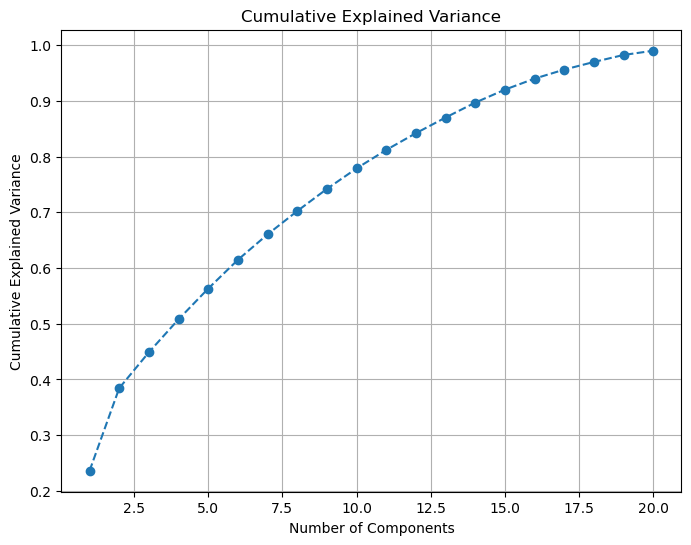

In [81]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=20)  
X_pca = pca.fit_transform(X_train_scaled)

# Analyze explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot cumulative explained variance to decide number of components
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [82]:
pca = PCA(n_components=10)  # Keep the first 10 principal components

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Clustering

## Check elbow method and silhouette score 

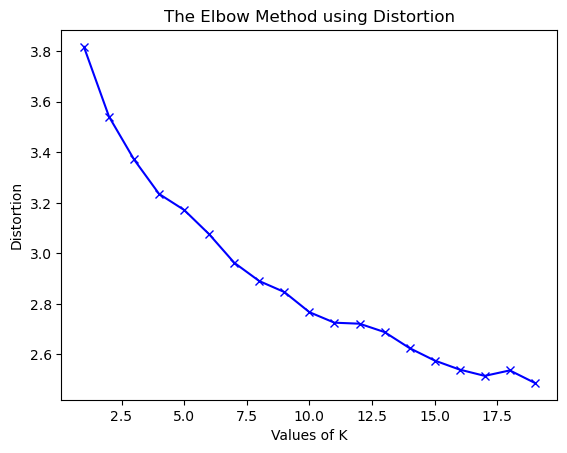

In [142]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
	kmeanModel.fit(X_train_pca)

	distortions.append(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X_train_pca.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X_train_pca.shape[0]
	mapping2[k] = kmeanModel.inertia_
 
 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

For n_clusters = 2, the average silhouette score is 0.1337
For n_clusters = 3, the average silhouette score is 0.2304
For n_clusters = 4, the average silhouette score is 0.1496
For n_clusters = 5, the average silhouette score is 0.1514
For n_clusters = 6, the average silhouette score is 0.1436
For n_clusters = 7, the average silhouette score is 0.1221
For n_clusters = 8, the average silhouette score is 0.1193
For n_clusters = 9, the average silhouette score is 0.1189
For n_clusters = 10, the average silhouette score is 0.1084


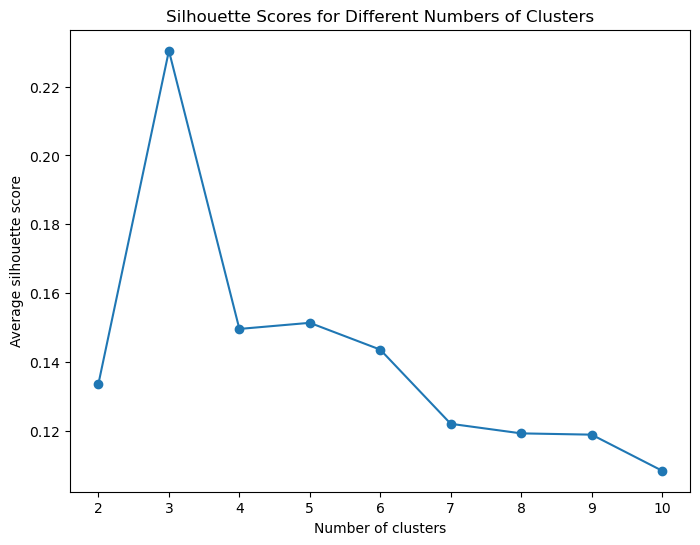

The optimal number of clusters is 3


In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimal_k_using_silhouette(X, range_n_clusters):
    """
    Determines the optimal number of clusters using the silhouette score.

    Parameters:
    X (numpy array): Feature set for clustering.
    range_n_clusters (list of int): List of number of clusters to try.

    Returns:
    best_n_clusters: The number of clusters that gives the best silhouette score.
    silhouette_avg_scores: A list of silhouette scores for each number of clusters.
    """
    silhouette_avg_scores = []
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.4f}")

    best_n_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
    return best_n_clusters, silhouette_avg_scores


range_n_clusters = list(range(2, 11))  # Try number of clusters from 2 to 10

# Find the optimal number of clusters using silhouette score
best_n_clusters, silhouette_avg_scores = optimal_k_using_3(X_train_pca, range_n_clusters)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

print(f"The optimal number of clusters is {best_n_clusters}")

## Perform clustering on train dataset

In [197]:
from sklearn.cluster import KMeans

def add_kmeans_clusters_with_scaling(X_train_scaled, X_test_scaled, n_clusters):
    """
    Scales the data, performs K-means clustering on the training data, and adds the cluster labels
    as a feature to both the training and testing datasets.

    Parameters:
    X_train (numpy array): Feature set for training.
    X_test (numpy array): Feature set for testing.
    n_clusters (int): Number of clusters for K-means.

    Returns:
    X_train_with_clusters, X_test_with_clusters: Updated training and testing sets with cluster labels.
    """
   
    # Perform K-means clustering on the scaled training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=54)
    train_clusters = kmeans.fit_predict(X_train_scaled)
    
    # Predict the cluster labels for the scaled test data using the same k-means model
    test_clusters = kmeans.predict(X_test_scaled)
    
    # Add the cluster labels as a new feature
    X_train_with_clusters = pd.DataFrame(X_train_scaled)
    X_train_with_clusters['Cluster'] = train_clusters
    X_test_with_clusters = pd.DataFrame(X_test_scaled)
    X_test_with_clusters['Cluster'] = test_clusters
    
    return X_train_with_clusters, X_test_with_clusters, kmeans

n_clusters = 3 # Number of clusters

# Add K-means clusters as a feature with scaling
X_train_with_clusters, X_test_with_clusters, kmeans = add_kmeans_clusters_with_scaling(X_train_pca, X_test_pca, n_clusters)


In [198]:
X_train_with_clusters['Cluster'].value_counts()

Cluster
0    2217
2    1722
1      51
Name: count, dtype: int64

In [199]:
X_test_with_clusters['Cluster'].value_counts()

Cluster
0    555
2    423
1     20
Name: count, dtype: int64

In [200]:
X_train_with_clusters.shape, y_train.shape, X_test_with_clusters.shape, y_test.shape

((3990, 11), (3990,), (998, 11), (998,))

In [201]:
X_train_with_clusters.columns = X_train_with_clusters.columns.astype(str)
X_test_with_clusters.columns = X_test_with_clusters.columns.astype(str)

In [202]:
# # Calculate additional aggregates if needed
# aggregates_train = X_train_with_clusters.groupby('Cluster').agg(['mean', 'std'])
# aggregates_test = X_test_with_clusters.groupby('Cluster').agg(['mean', 'std'])

# # Save the additional aggregates to a CSV file
# aggregates_train.to_csv('clusters_describe_train.csv')
# aggregates_test.to_csv('clusters_describe_test.csv')

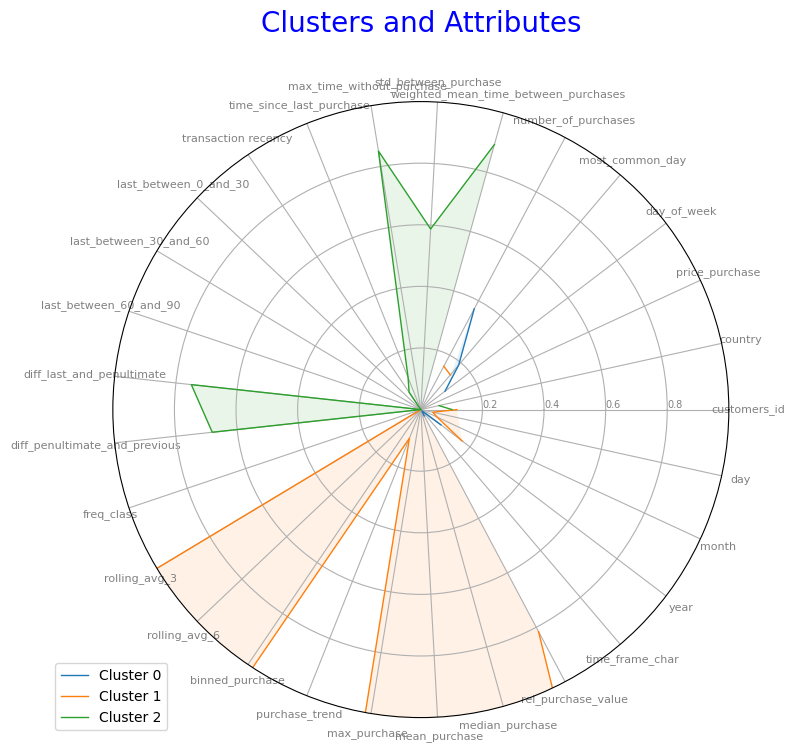

In [203]:
from sklearn.cluster import KMeans

def add_kmeans_clusters_with_scaling(X_train_scaled, X_test_scaled, n_clusters):
    """
    Scales the data, performs K-means clustering on the training data, and adds the cluster labels
    as a feature to both the training and testing datasets.

    Parameters:
    X_train (numpy array): Feature set for training.
    X_test (numpy array): Feature set for testing.
    n_clusters (int): Number of clusters for K-means.

    Returns:
    X_train_with_clusters, X_test_with_clusters: Updated training and testing sets with cluster labels.
    """
   
    # Perform K-means clustering on the scaled training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=54)
    train_clusters = kmeans.fit_predict(X_train_scaled)
    
    # Predict the cluster labels for the scaled test data using the same k-means model
    test_clusters = kmeans.predict(X_test_scaled)
    
    # Add the cluster labels as a new feature
    X_train_with_clusters = pd.DataFrame(X_train_scaled)
    X_train_with_clusters['Cluster'] = train_clusters
    X_test_with_clusters = pd.DataFrame(X_test_scaled)
    X_test_with_clusters['Cluster'] = test_clusters
    
    return X_train_with_clusters, X_test_with_clusters, kmeans

def plot_radar_chart(X, kmeans, n_clusters):
    """
    Plots a radar chart for the given clustering results.

    Parameters:
    X (DataFrame): Feature set with cluster labels.
    kmeans (KMeans): Trained KMeans model.
    n_clusters (int): Number of clusters.
    """
    # Compute the mean values for each attribute in each cluster
    cluster_means = X.groupby('Cluster').mean()

    # Number of variables we're plotting
    categories = list(X.columns[:-1])  # Exclude the cluster column
    N = len(categories)

    # What will be the angle of each axis in the plot (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0, 1)

    # Plot each cluster
    for i in range(n_clusters):
        values = cluster_means.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {i}")
        ax.fill(angles, values, alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Clusters and Attributes', size=20, color='blue', y=1.1)
    plt.show()

# Add K-means clusters as a feature with scaling
X_train_with_clusters_2, X_test_with_clusters_2, kmeans = add_kmeans_clusters_with_scaling(X_train_scaled, X_test_scaled, n_clusters)

# Combine train and test sets for plotting
X_combined_2 = pd.concat([X_train_with_clusters_2, X_test_with_clusters_2])

# Plot the radar chart
plot_radar_chart(X_combined_2, kmeans, n_clusters)

# Implement GAN for resampling


1/1 [==============================] - 0s 404ms/step


0 [D loss: 0.6974978148937225 | D accuracy: 0.0] [G loss: 0.6853480339050293]
1/1 [==============================] - 0s 28ms/step
100 [D loss: 0.688206285238266 | D accuracy: 0.0] [G loss: 0.6205533742904663]
1/1 [==============================] - 0s 44ms/step
200 [D loss: 0.6710358262062073 | D accuracy: 0.0] [G loss: 0.6126879453659058]
1/1 [==============================] - 0s 69ms/step
300 [D loss: 0.6768259704113007 | D accuracy: 0.0] [G loss: 0.608574628829956]
1/1 [==============================] - 0s 51ms/step
400 [D loss: 0.6599116325378418 | D accuracy: 0.0] [G loss: 0.6290706396102905]
1/1 [==============================] - 0s 47ms/step
500 [D loss: 0.6523706018924713 | D accuracy: 0.0] [G loss: 0.6188306212425232]
1/1 [==============================] - 0s 48ms/step
600 [D loss: 0.6571218073368073 | D accuracy: 0.0] [G loss: 0.6255263686180115]
1/1 [==============================] - 0s 47ms/step
700 [D loss: 0.649931848

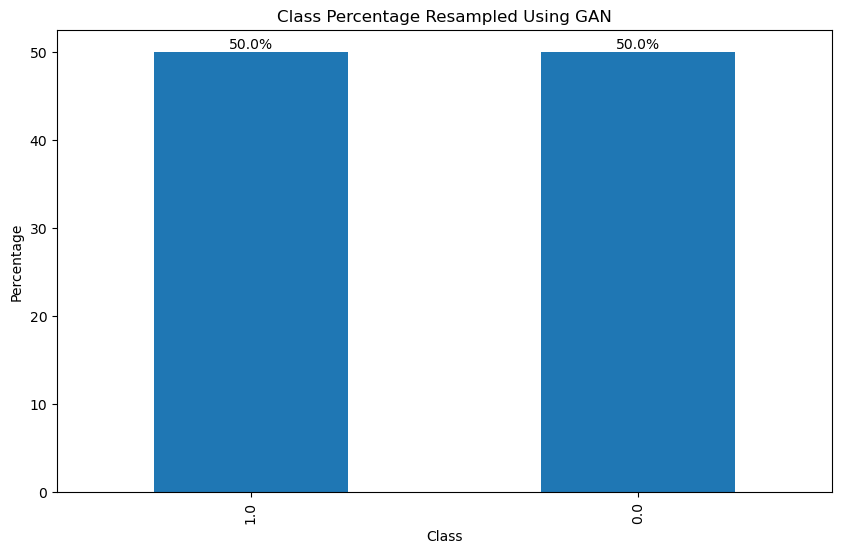

In [83]:
from tensorflow.keras.optimizers import RMSprop

# Calculate the number of synthetic samples needed
n_minority_class = np.sum(y_train == 0)
n_majority_class = np.sum(y_train == 1)
n_synthetic_samples = n_majority_class - n_minority_class

# Generator
def build_generator(latent_dim, n_features):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(n_features, activation='tanh'))
    return model

# Discriminator
def build_discriminator(n_features):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=n_features))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(32))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

latent_dim = 50
generator = build_generator(latent_dim, X_train_pca.shape[1])
discriminator = build_discriminator(X_train_pca.shape[1])
discriminator.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005), metrics=['accuracy'])

# Compile GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005))
    return gan

gan = build_gan(generator, discriminator)

def train_gan(gan, generator, discriminator, data, latent_dim, epochs=10000, batch_size=64, sample_interval=100):
    half_batch = int(batch_size / 2)
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data[idx]
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise)

        real_labels = np.ones((half_batch, 1)) * 0.9
        fake_labels = np.zeros((half_batch, 1)) + 0.1

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

train_gan(gan, generator, discriminator, X_train_pca, latent_dim)

def generate_synthetic_data(generator, latent_dim, n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    synthetic_features = generator.predict(noise)
    return synthetic_features

# Generate synthetic data
synthetic_data = generate_synthetic_data(generator, latent_dim, n_synthetic_samples)

# Combine synthetic data with minority class labels
y_synthetic_gan = np.zeros(synthetic_data.shape[0])  # Label synthetic data as class 0

# Combine real and synthetic data for resampling
X_train_resampled_gan = np.concatenate((X_train_pca, synthetic_data))
y_train_resampled_gan = np.concatenate((y_train, y_synthetic_gan))

# Convert y_train_resampled_gan to pandas Series to use value_counts
y_train_resampled_gan_series = pd.Series(y_train_resampled_gan)

# Calculate class percentage
class_percentage_gan = (y_train_resampled_gan_series.value_counts(normalize=True) * 100).round(0)
print(class_percentage_gan)

# Plot the bar graph
plt.figure(figsize=(10, 6))
class_percentage_gan.plot(kind='bar')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentage Resampled Using GAN')

# Show the values on the bars
for index, value in enumerate(class_percentage_gan):
    plt.text(index, value, f'{value}%', ha='center', va='bottom')

# Show the plot
plt.show()

# Implement VAE for resampling 

In [89]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Calculate the number of synthetic samples needed
n_minority_class = np.sum(y_train == 0)
n_majority_class = np.sum(y_train == 1)
n_synthetic_samples = n_majority_class - n_minority_class

# Separate minority class data
minority_class_data = X_train_pca[y_train == 0]

# Step 2: Define the VAE
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=-1)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

def loss_function(recon_x, x, mu, log_var):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

# Step 3: Train the VAE on the minority class data
input_dim = minority_class_data.shape[1]
hidden_dim = 64
latent_dim = 20
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Convert minority class data to tensor
minority_class_tensor = torch.FloatTensor(minority_class_data)
dataset = TensorDataset(minority_class_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Training loop
epochs = 100
for epoch in range(epochs):
    for batch in dataloader:
        x, = batch
        optimizer.zero_grad()
        recon_x, mu, log_var = vae(x)
        loss = loss_function(recon_x, x, mu, log_var)
        loss.backward()
        optimizer.step()

# Step 4: Generate synthetic samples
vae.eval()
with torch.no_grad():
    z = torch.randn(n_synthetic_samples, latent_dim)
    synthetic_samples = vae.decode(z).numpy()

# Combine original data with synthetic samples
X_train_resampled_vae = np.vstack((X_train_pca, synthetic_samples))
y_train_resampled_vae = np.hstack((y_train, np.zeros(n_synthetic_samples)))

# Convert the labels of the synthetic samples to the minority class label (0 in this case)
y_train_resampled_vae[-n_synthetic_samples:] = 0


1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


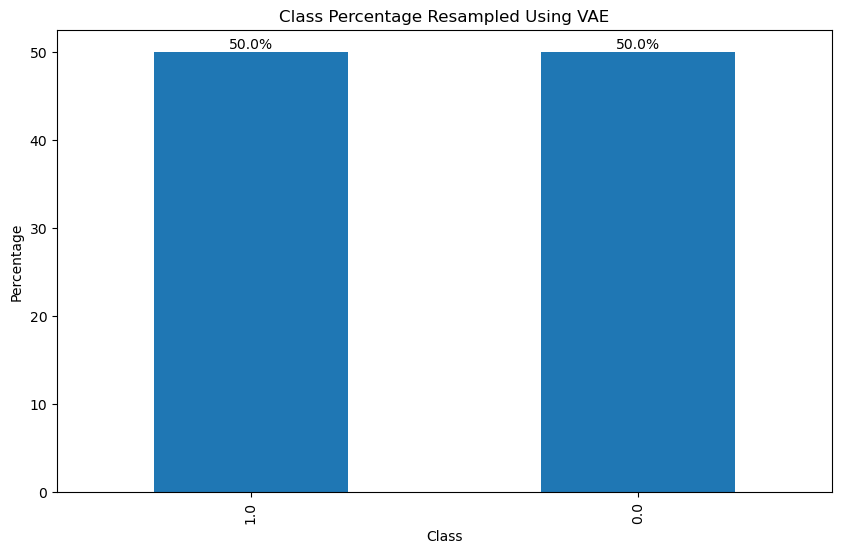

In [90]:
# Convert y_train_resampled_gan to pandas Series to use value_counts
y_train_resampled_vae_series = pd.Series(y_train_resampled_vae)

# Calculate class percentage
class_percentage_vae = (y_train_resampled_vae_series.value_counts(normalize=True) * 100).round(0)
print(class_percentage_vae)

# Plot the bar graph
plt.figure(figsize=(10, 6))
class_percentage_vae.plot(kind='bar')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentage Resampled Using VAE')

# Show the values on the bars
for index, value in enumerate(class_percentage_vae):
    plt.text(index, value, f'{value}%', ha='center', va='bottom')

# Show the plot
plt.show()

# Implement SMOTE for resampling

label
1    50.0
0    50.0
Name: proportion, dtype: float64


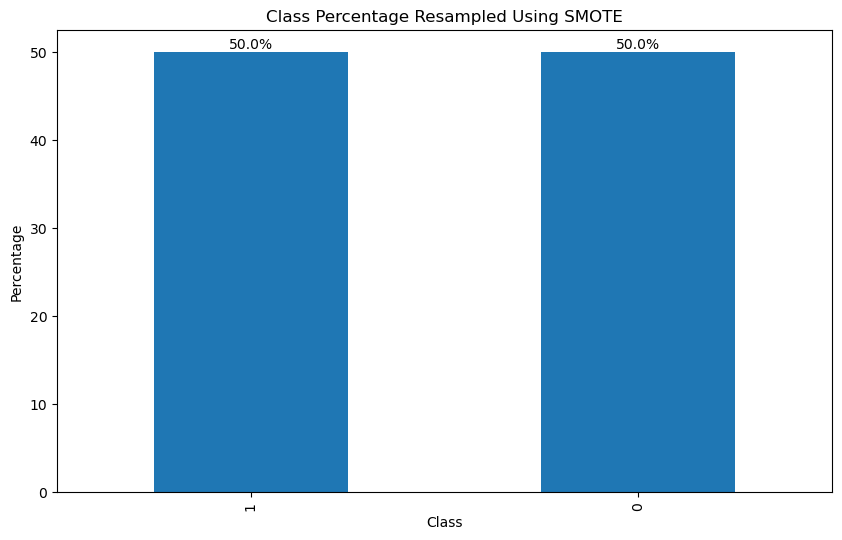

In [91]:
# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_pca, y_train)

# Convert y_train_resampled_smote to pandas Series to use value_counts
y_train_resampled_smote_series = pd.Series(y_train_resampled_smote)

# Calculate class percentage
class_percentage = (y_train_resampled_smote_series.value_counts(normalize=True) * 100).round(0)
print(class_percentage)

# Plot the bar graph
plt.figure(figsize=(10, 6))
class_percentage.plot(kind='bar')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Class Percentage Resampled Using SMOTE')

# Show the values on the bars
for index, value in enumerate(class_percentage):
    plt.text(index, value, f'{value}%', ha='center', va='bottom')

# Show the plot
plt.show()

# Build the model 

## SVM for For GAN, VAE, SMOTE and Clustering (PCA)

In [101]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

def train_svm(X_train, y_train, X_test, y_test):
    """
    Trains an SVM classifier on the given dataset and prints the classification report.

    Parameters:
    X_train (numpy array): Feature set for training.
    y_train (numpy array): Label set for training.

    Returns:
    clf: Trained SVM model.
    """
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    
    # Print the classification report on the training set
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual Neg','Actual Pos'], columns=['Predicted Neg','Predicted Pos'])
    print("Confusion Matrix:\n", cm_df)
    
    return clf

### original (PCA)

In [116]:
svm_model_original = train_svm(X_train_pca, y_train, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.16      0.27       212
           1       0.81      0.99      0.89       786

    accuracy                           0.81       998
   macro avg       0.81      0.58      0.58       998
weighted avg       0.81      0.81      0.76       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg             34            178
Actual Pos              8            778


### GAN resampling 

In [115]:
svm_model_gan = train_svm(X_train_resampled_gan, y_train_resampled_gan, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.72      0.43       212
           1       0.88      0.56      0.68       786

    accuracy                           0.59       998
   macro avg       0.59      0.64      0.55       998
weighted avg       0.76      0.59      0.63       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            152             60
Actual Pos            348            438


### VAE resampling 

In [113]:
svm_model_vae = train_svm(X_train_resampled_vae, y_train_resampled_vae, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.56      0.47       212
           1       0.87      0.78      0.82       786

    accuracy                           0.73       998
   macro avg       0.64      0.67      0.65       998
weighted avg       0.77      0.73      0.75       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            119             93
Actual Pos            173            613


### SMOTE resampling 

In [114]:
svm_model_smote = train_svm(X_train_resampled_smote, y_train_resampled_smote, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.80      0.52       212
           1       0.92      0.65      0.76       786

    accuracy                           0.68       998
   macro avg       0.65      0.72      0.64       998
weighted avg       0.81      0.68      0.71       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            169             43
Actual Pos            275            511


### With Clustering as a feature

In [204]:
svm_model_clustering = train_svm(X_train_with_clusters, y_train, X_test_with_clusters, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.17      0.27       212
           1       0.81      0.99      0.89       786

    accuracy                           0.81       998
   macro avg       0.80      0.58      0.58       998
weighted avg       0.81      0.81      0.76       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg             35            177
Actual Pos              9            777


## Decision Tree for For GAN, VAE, SMOTE and Clustering (PCA)

In [214]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

def train_decision_tree(X_train, y_train, X_test, y_test, show_tree=False):
    """
    Trains a Decision Tree classifier on the given dataset, prints the classification report,
    and the confusion matrix, and optionally displays the tree.

    Parameters:
    X_train (numpy array): Feature set for training.
    y_train (numpy array): Label set for training.
    X_test (numpy array): Feature set for testing.
    y_test (numpy array): Label set for testing.
    show_tree (bool): Whether to display the tree. Default is False.

    Returns:
    clf: Trained Decision Tree model.
    """
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual Neg','Actual Pos'], columns=['Predicted Neg','Predicted Pos'])
    print("Confusion Matrix:\n", cm_df)
    
    # Plot the tree if requested
    if show_tree:
        plt.figure(figsize=(20, 10))
        if isinstance(X_train, pd.DataFrame):
            plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
        else:
            plot_tree(clf, filled=True, class_names=True, rounded=True)
        plt.show()
    
    return clf

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54       212
           1       0.88      0.87      0.88       786

    accuracy                           0.80       998
   macro avg       0.71      0.71      0.71       998
weighted avg       0.80      0.80      0.80       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            116             96
Actual Pos            100            686


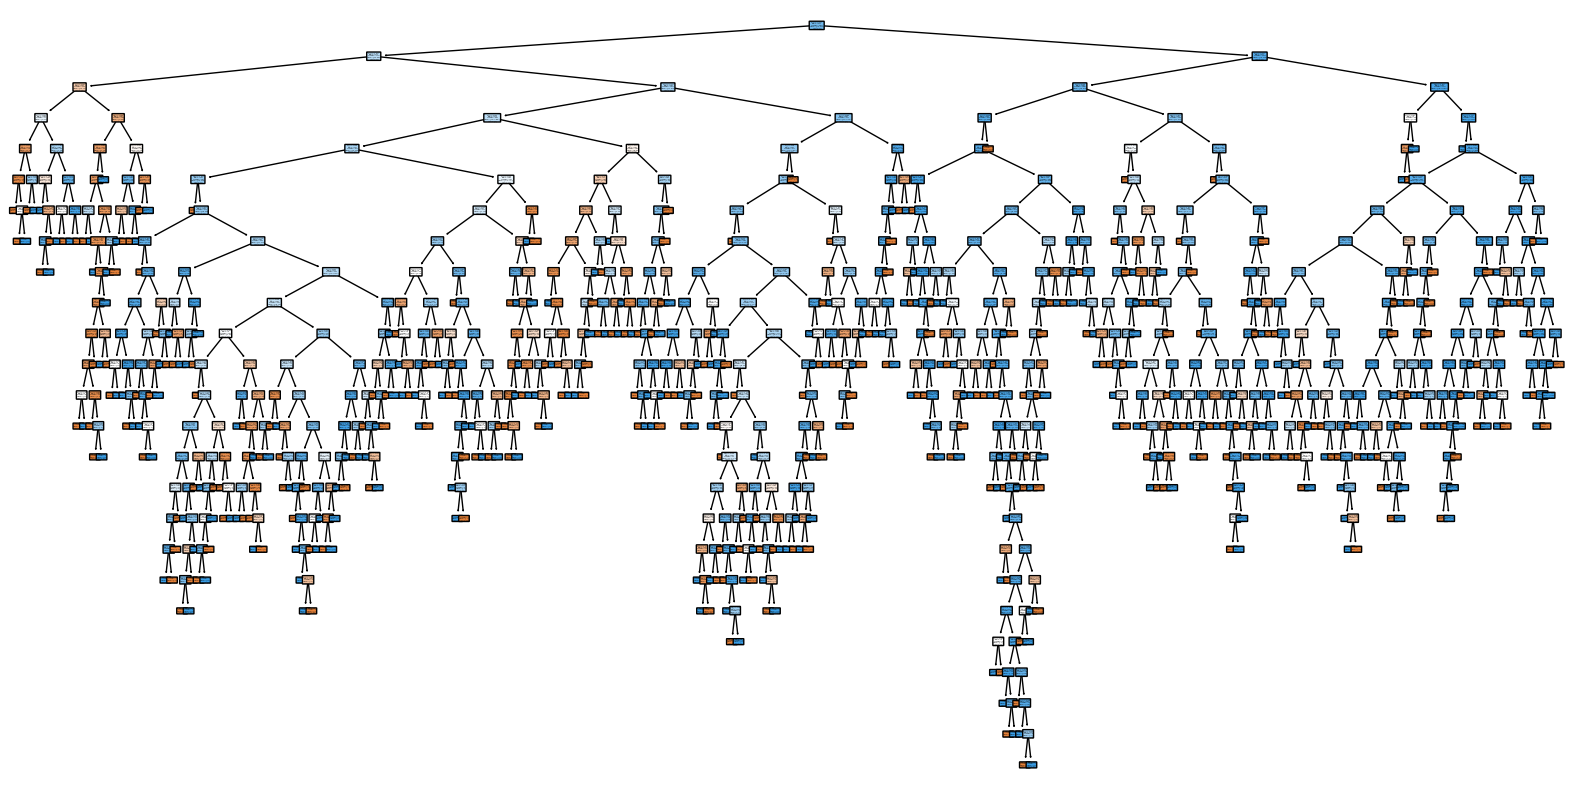

In [215]:
dt_model_original = train_decision_tree(X_train_pca, y_train, X_test_pca, y_test, show_tree=True)

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.62      0.57       212
           1       0.89      0.85      0.87       786

    accuracy                           0.80       998
   macro avg       0.71      0.74      0.72       998
weighted avg       0.82      0.80      0.81       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            131             81
Actual Pos            114            672


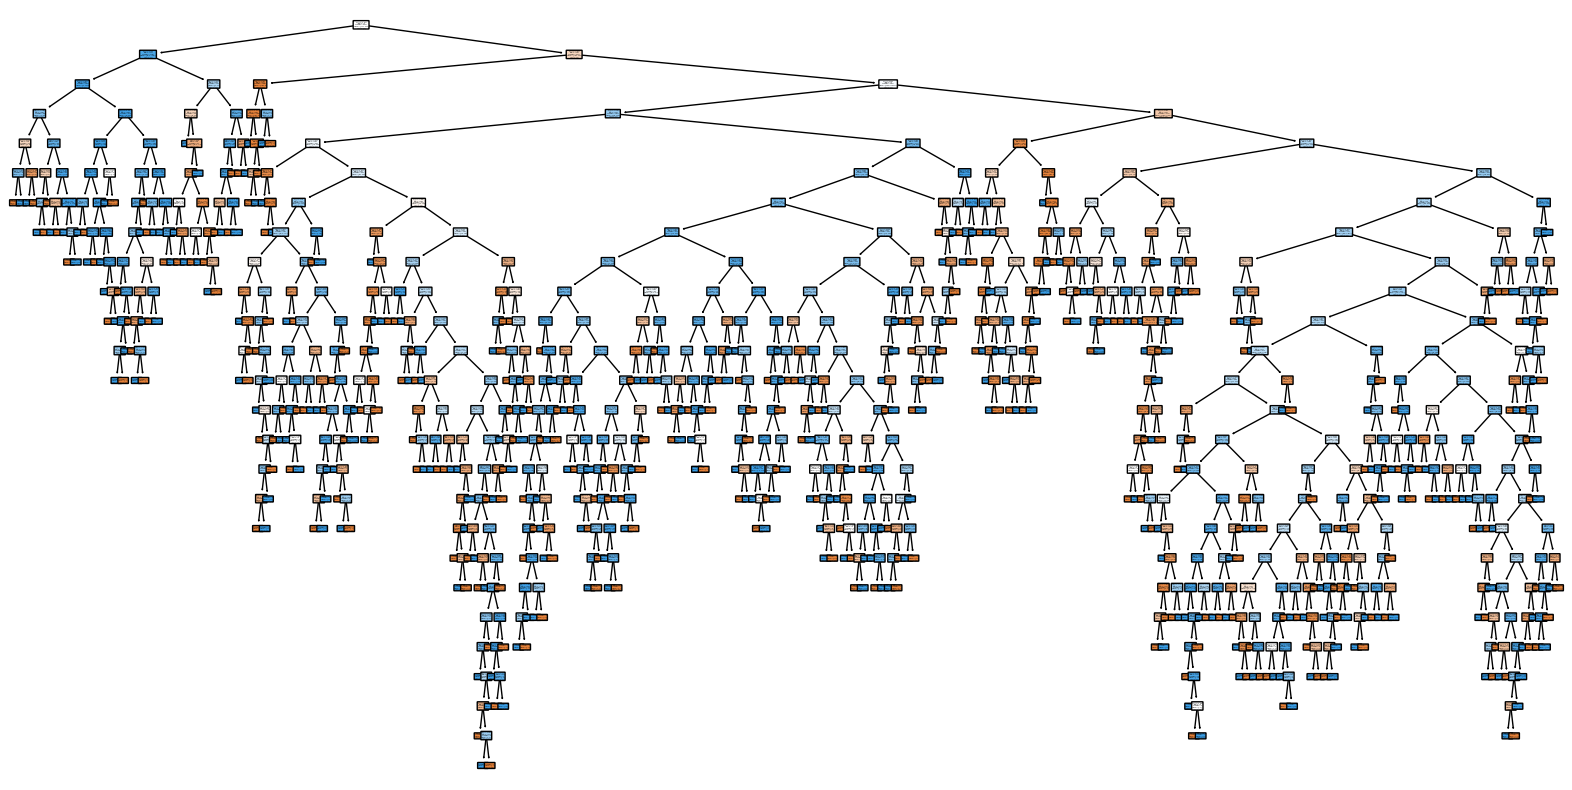

In [216]:
dt_model_gan = train_decision_tree(X_train_resampled_gan, y_train_resampled_gan, X_test_pca, y_test, show_tree=True)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.64      0.54       212
           1       0.89      0.80      0.84       786

    accuracy                           0.77       998
   macro avg       0.68      0.72      0.69       998
weighted avg       0.80      0.77      0.78       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            135             77
Actual Pos            157            629


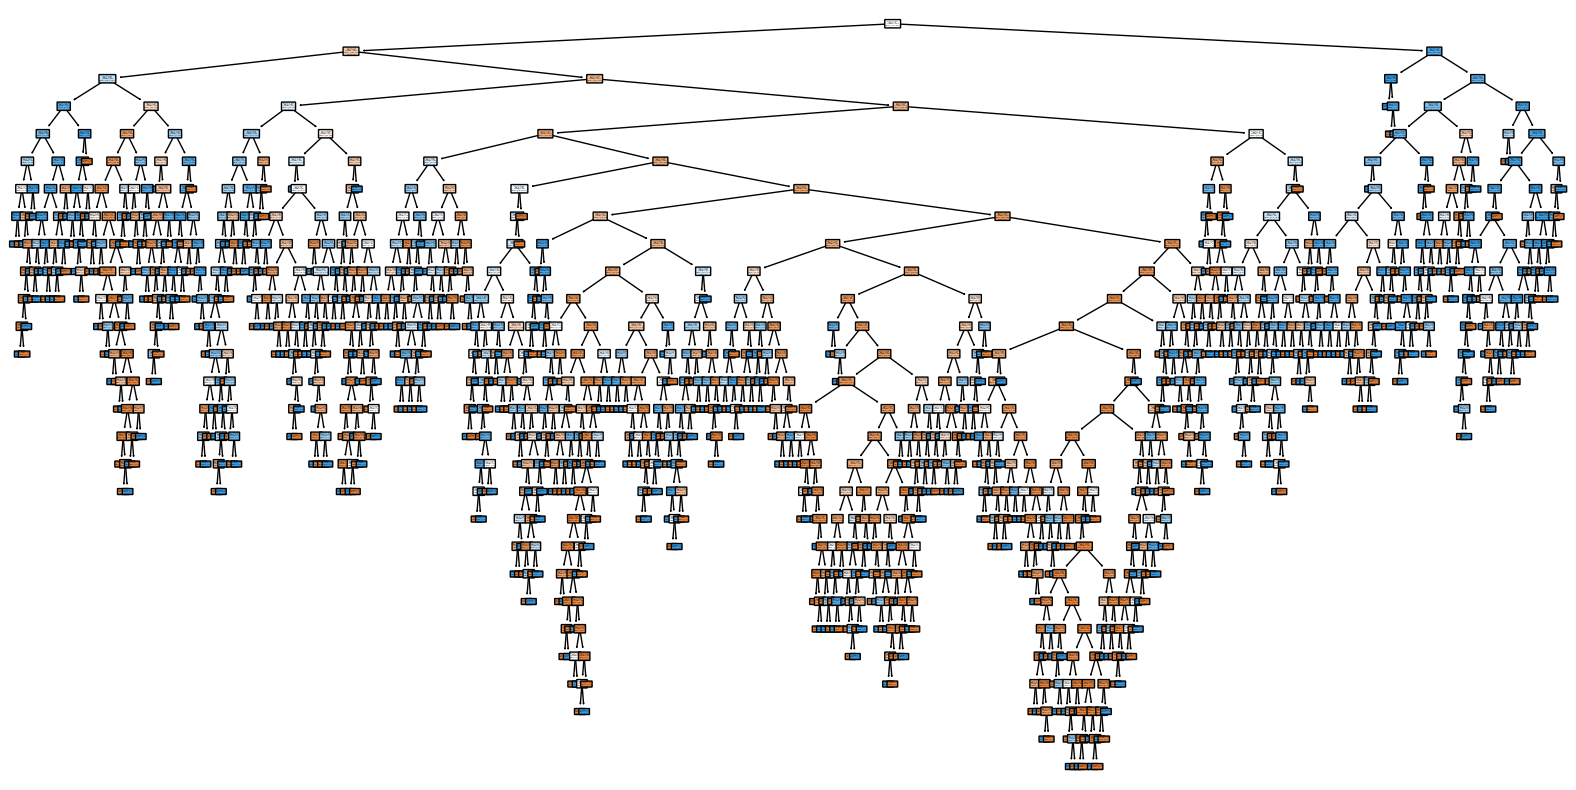

In [217]:
dt_model_vae = train_decision_tree(X_train_resampled_vae, y_train_resampled_vae, X_test_pca, y_test, show_tree=True)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.65      0.57       212
           1       0.90      0.83      0.86       786

    accuracy                           0.79       998
   macro avg       0.70      0.74      0.72       998
weighted avg       0.81      0.79      0.80       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            137             75
Actual Pos            132            654


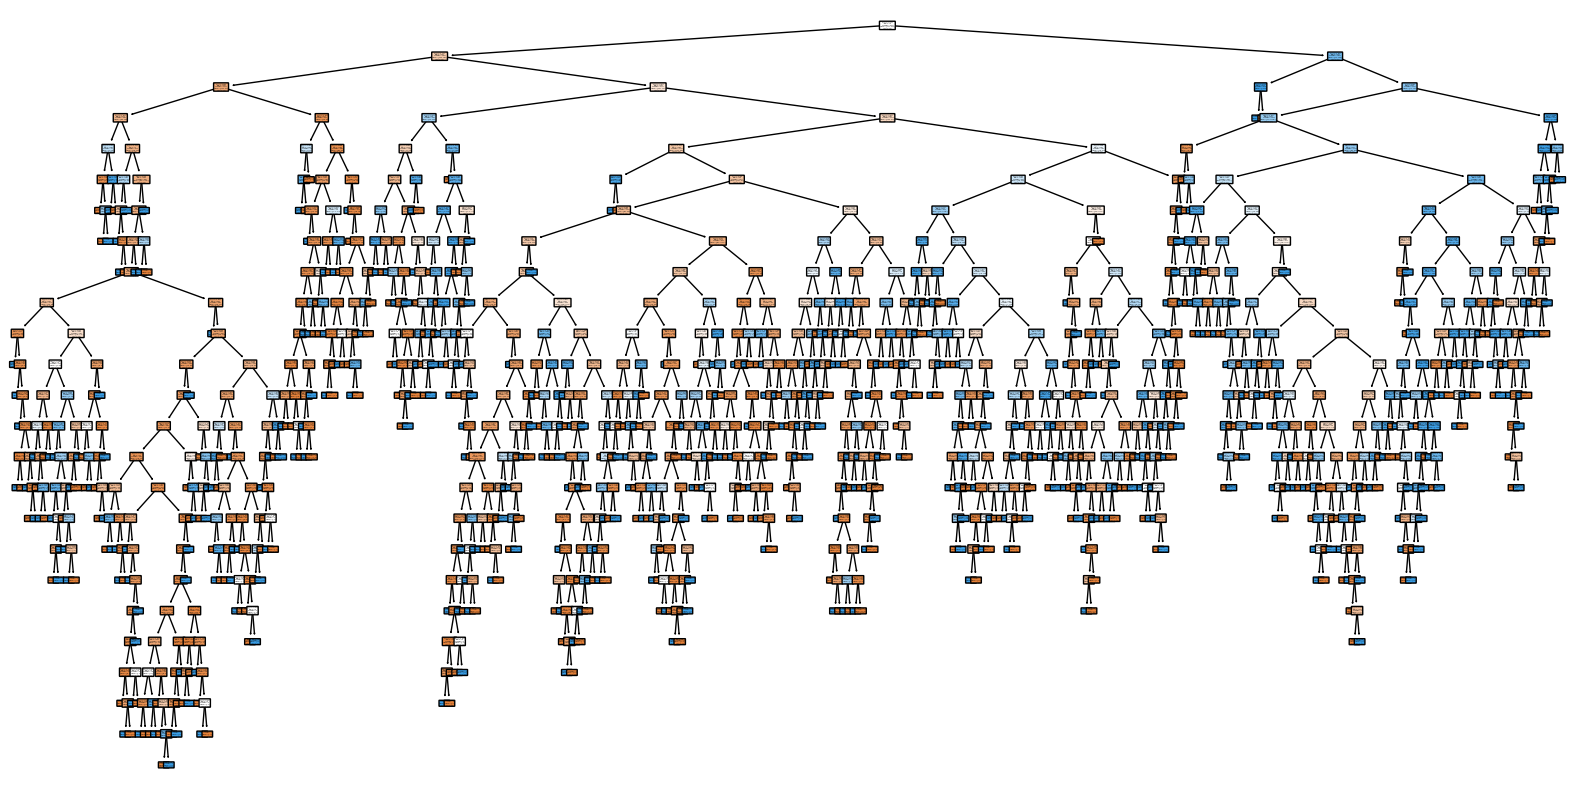

In [218]:
dt_model_smote = train_decision_tree(X_train_resampled_smote, y_train_resampled_smote, X_test_pca, y_test, show_tree=True)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.59      0.57       212
           1       0.89      0.88      0.88       786

    accuracy                           0.81       998
   macro avg       0.72      0.73      0.73       998
weighted avg       0.82      0.81      0.82       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            125             87
Actual Pos             98            688


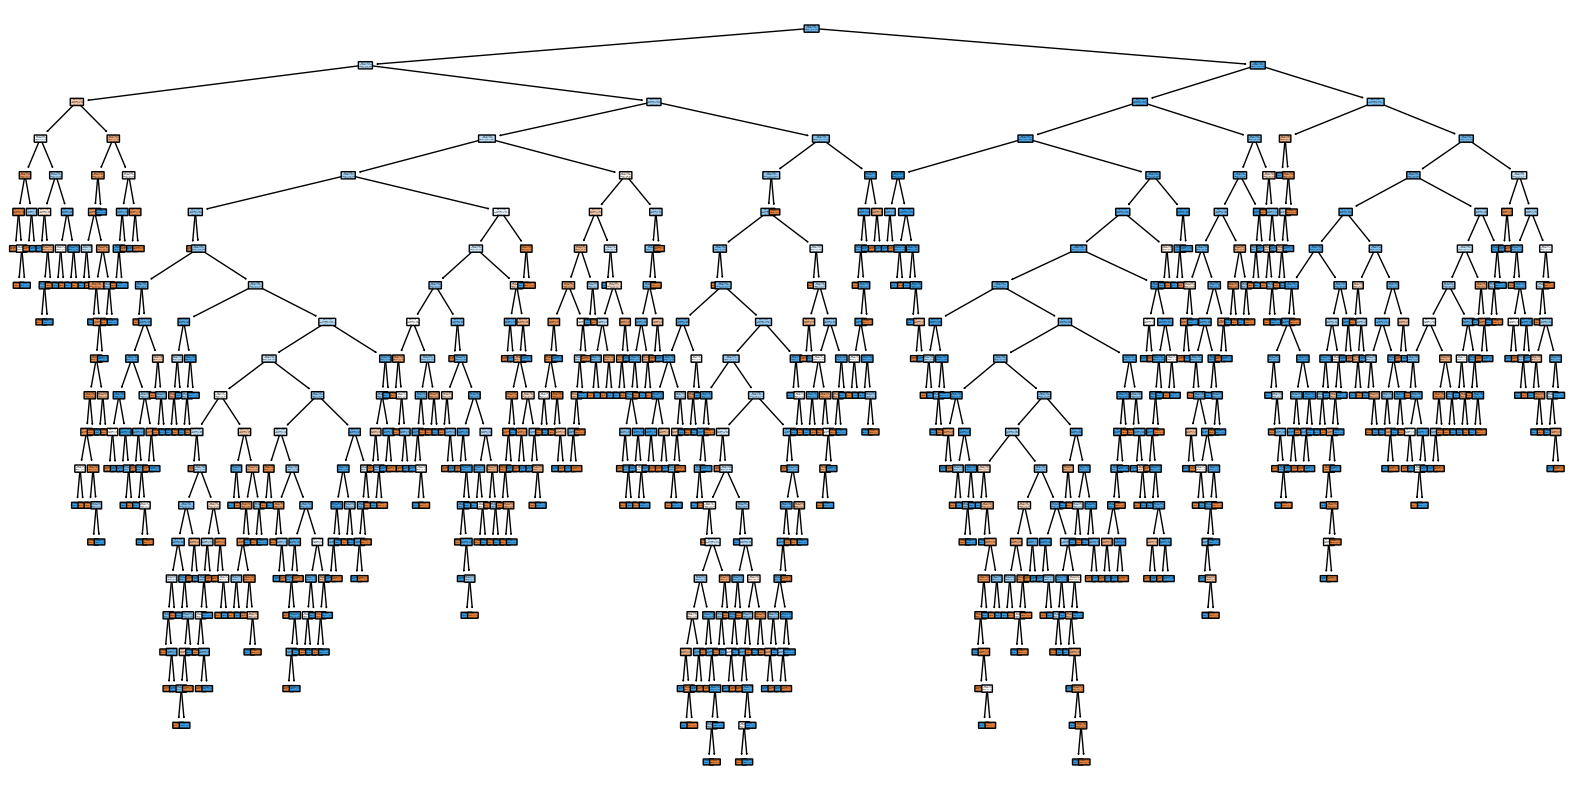

In [219]:
dt_model_clustering = train_decision_tree(X_train_with_clusters, y_train, X_test_with_clusters, y_test, show_tree=True)

## XGBoost + Grid Search

In [183]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score 

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search for hyperparameter optimization
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Train the final model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb_model.predict(X_test_scaled)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Test set accuracy:  0.9819639278557114


In [186]:
# For the Train-Test
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       216
           1       0.99      0.98      0.99       782

    accuracy                           0.98       998
   macro avg       0.97      0.98      0.97       998
weighted avg       0.98      0.98      0.98       998



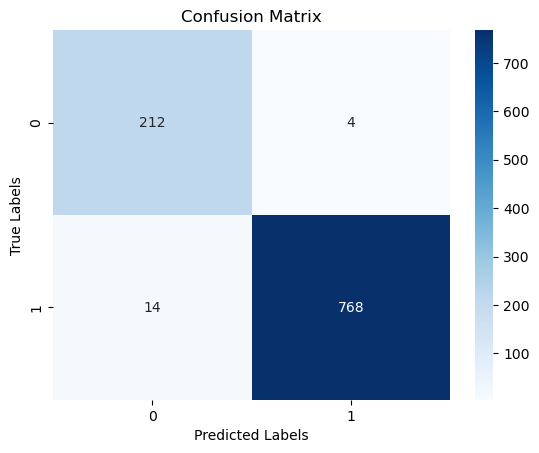

In [204]:
# For the Train-Test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Feature importance

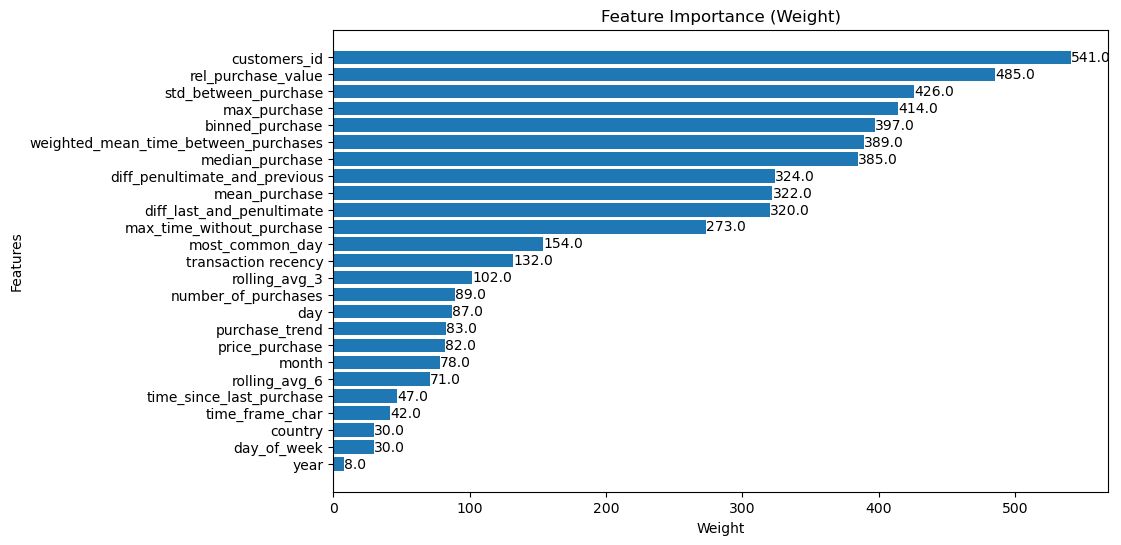

In [184]:
# Extract the feature importance scores
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features, values = zip(*sorted_importance)

# Round the values
values = np.round(values, 2)

# Create the custom plot
plt.figure(figsize=(10, 6))
plt.barh(features, values)
plt.xlabel('Weight')
plt.ylabel('Features')
plt.title('Feature Importance (Weight)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top

# Annotate each bar with the rounded values
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

plt.show()


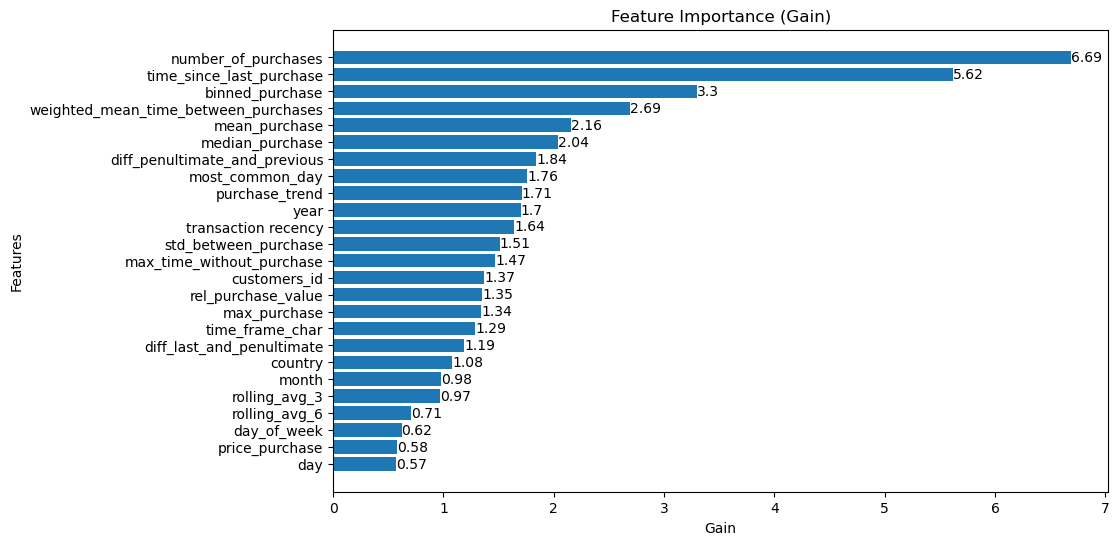

In [185]:
# Extract the feature importance scores
importance = best_xgb_model.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features, values = zip(*sorted_importance)

# Round the values
values = np.round(values, 2)

# Create the custom plot
plt.figure(figsize=(10, 6))
plt.barh(features, values)
plt.xlabel('Gain')
plt.ylabel('Features')
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top

# Annotate each bar with the rounded values
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

plt.show()

## XGBoost + GridSearch (PCA data)

In [200]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score 

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search for hyperparameter optimization
grid_search_pca = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found with PCA: ", grid_search_pca.best_params_)

# Train the final model with the best parameters
best_xgb_model_pca = grid_search_pca.best_estimator_

# Predict on the test set
y_pred_pca = best_xgb_model_pca.predict(X_test_pca)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [201]:
# For the Train-Test (PCA)
from sklearn.metrics import classification_report
classification_rep_pca = classification_report(y_test,y_pred_pca)
print(classification_rep_pca)

              precision    recall  f1-score   support

           0       0.79      0.56      0.65       216
           1       0.89      0.96      0.92       782

    accuracy                           0.87       998
   macro avg       0.84      0.76      0.79       998
weighted avg       0.87      0.87      0.86       998



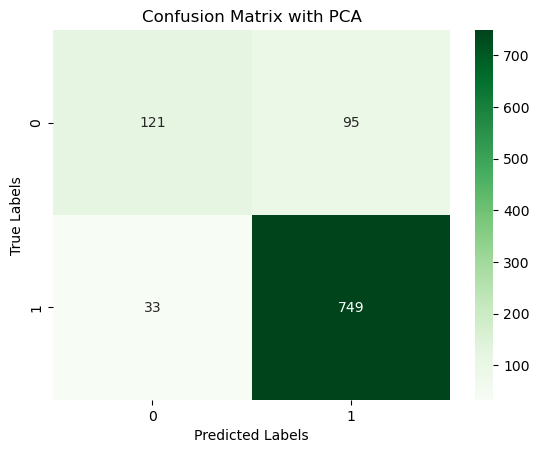

In [203]:
# For the Train-Test (PCA)
from sklearn.metrics import confusion_matrix

cm_pca = confusion_matrix(y_test,y_pred_pca)

sns.heatmap(cm_pca, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with PCA')
plt.show()

### Feature importance

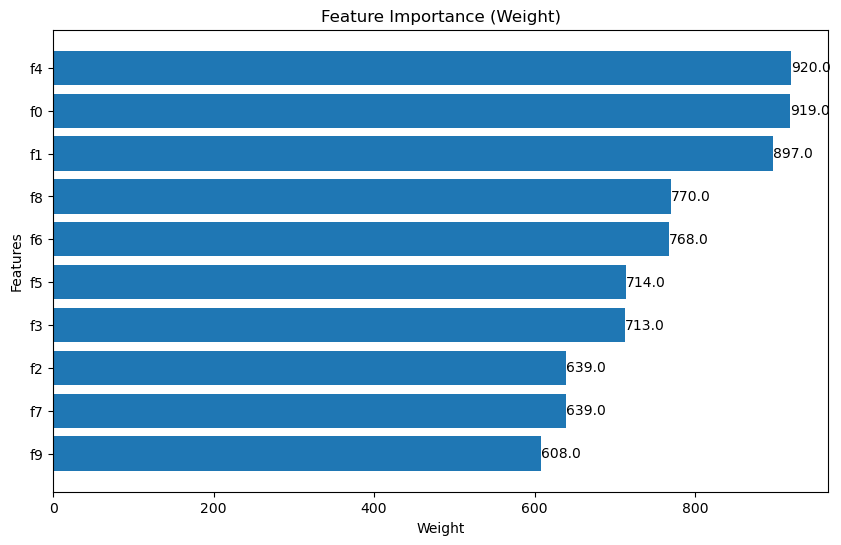

In [205]:
# Extract the feature importance scores
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features, values = zip(*sorted_importance)

# Round the values
values = np.round(values, 2)

# Create the custom plot
plt.figure(figsize=(10, 6))
plt.barh(features, values)
plt.xlabel('Weight')
plt.ylabel('Features')
plt.title('Feature Importance (Weight)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top

# Annotate each bar with the rounded values
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

plt.show()

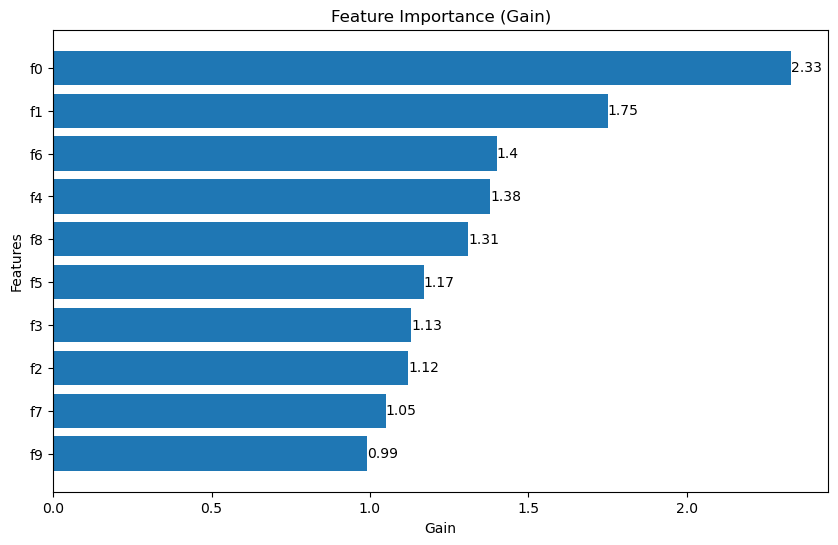

In [206]:
# Extract the feature importance scores
importance = best_xgb_model.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features, values = zip(*sorted_importance)

# Round the values
values = np.round(values, 2)

# Create the custom plot
plt.figure(figsize=(10, 6))
plt.barh(features, values)
plt.xlabel('Gain')
plt.ylabel('Features')
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top

# Annotate each bar with the rounded values
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center')

plt.show()

### For GAN, VAE, SMOTE and Clustering

In [206]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

def train_xgboost(X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost classifier on the given dataset, prints the classification report,
    and the confusion matrix.

    Parameters:
    X_train (numpy array): Feature set for training.
    y_train (numpy array): Label set for training.
    X_test (numpy array): Feature set for testing.
    y_test (numpy array): Label set for testing.

    Returns:
    clf: Trained XGBoost model.
    """
    clf = XGBClassifier(colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8, use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual Neg','Actual Pos'], columns=['Predicted Neg','Predicted Pos'])
    print("Confusion Matrix:\n", cm_df)
    
    return clf

In [207]:
xgb_model_original = train_xgboost(X_train_pca, y_train, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.54      0.62       212
           1       0.88      0.95      0.91       786

    accuracy                           0.86       998
   macro avg       0.81      0.74      0.77       998
weighted avg       0.85      0.86      0.85       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            115             97
Actual Pos             43            743


In [208]:
xgb_model_gan = train_xgboost(X_train_resampled_gan, y_train_resampled_gan, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       212
           1       0.89      0.93      0.91       786

    accuracy                           0.86       998
   macro avg       0.79      0.75      0.77       998
weighted avg       0.85      0.86      0.85       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            122             90
Actual Pos             54            732


In [209]:
xgb_model_vae = train_xgboost(X_train_resampled_vae, y_train_resampled_vae, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       212
           1       0.90      0.86      0.88       786

    accuracy                           0.81       998
   macro avg       0.73      0.75      0.74       998
weighted avg       0.83      0.81      0.82       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            136             76
Actual Pos            110            676


In [210]:
xgb_model_smote = train_xgboost(X_train_resampled_smote, y_train_resampled_smote, X_test_pca, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       212
           1       0.92      0.89      0.90       786

    accuracy                           0.85       998
   macro avg       0.77      0.79      0.78       998
weighted avg       0.85      0.85      0.85       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            148             64
Actual Pos             89            697


In [211]:
xgb_model_clustering = train_xgboost(X_train_with_clusters, y_train, X_test_with_clusters, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.58      0.64       212
           1       0.89      0.94      0.91       786

    accuracy                           0.86       998
   macro avg       0.80      0.76      0.78       998
weighted avg       0.85      0.86      0.86       998

Confusion Matrix:
             Predicted Neg  Predicted Pos
Actual Neg            123             89
Actual Pos             50            736
